In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib.patches import Polygon
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse


import numpy as np
from numpy import *

from PIL import Image
import os
import json
import cv2
import PIL

import math
import io


In [2]:
def get_img_from_fig(fig, dpi=None):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

In [3]:
def get_coords(n):

    t = arange(0,360+(360/(n)),360/(n))
    #t = arange(0,360,360/n)
    x = 10*sin(radians(t))
    y=10*cos(radians(t))
    
    return x,y

In [4]:
def images_to_sprite(data):
    """Creates the sprite image along with any necessary padding
    Args:
    data: NxHxW[x3] tensor containing the images.
    Returns:
    data: Properly shaped HxWx3 image with any necessary padding.
    """
    if len(data.shape) == 3:
        data = np.tile(data[...,np.newaxis], (1,1,1,3))
    data = data.astype(np.float32)
    min = np.min(data.reshape((data.shape[0], -1)), axis=1)
    data = (data.transpose(1,2,3,0) - min).transpose(3,0,1,2)
    max = np.max(data.reshape((data.shape[0], -1)), axis=1)
    data = (data.transpose(1,2,3,0) / max).transpose(3,0,1,2)
    # Inverting the colors seems to look better for MNIST
    #data = 1 - data

    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, 0),
            (0, 0)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=1)
    # Tile the individual thumbnails into an image.
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3)
            + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    data = (data * 255).astype(np.uint8)
    return data

### Draw individual imgs


'b' as blue
'g' as green
'r' as red
'c' as cyan
'm' as magenta
'y' as yellow
'k' as black
'w' as white

patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

In [5]:
# pattern="x"
# fc="b"
# n=4
# scale=0.8
# stretch=1

In [6]:
pattern_s=["x","o","*",None]
fc_s=["b","g","r","c","m","y"]
n_s=[3,4,5,"round"]
stretch_s=[0.5,1,1.5]
scale_s=[0.2,0.5,0.7]

In [7]:
figsize=4
dpi=224/figsize

In [8]:
alpha=0.6

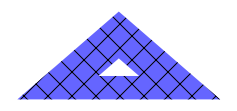

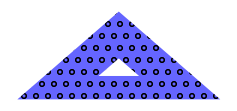

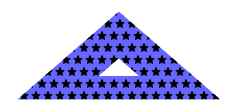

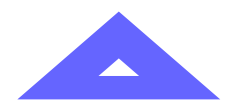

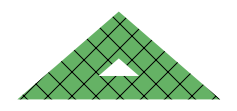

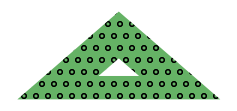

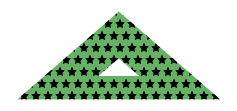

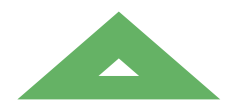

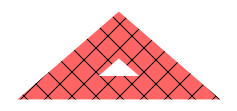

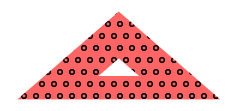

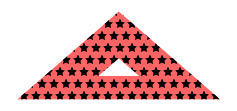

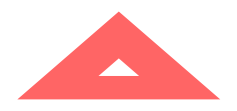

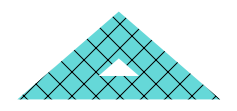

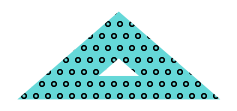

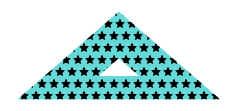

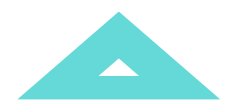

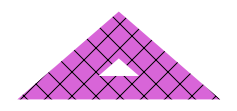

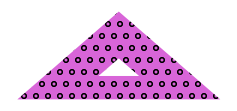

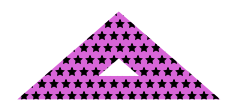

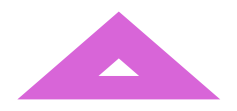

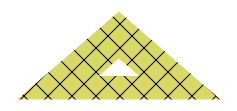

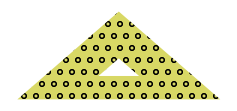

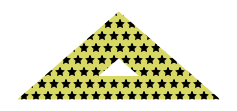

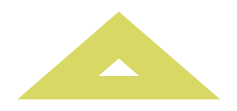

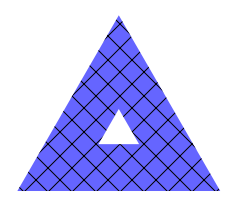

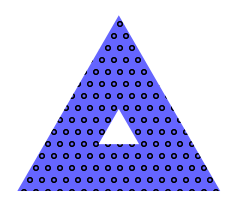

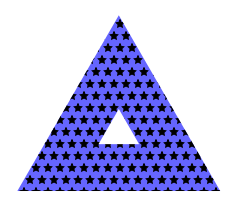

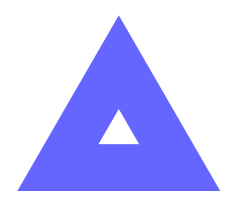

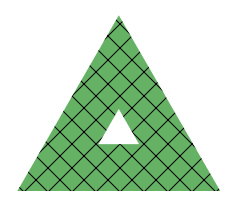

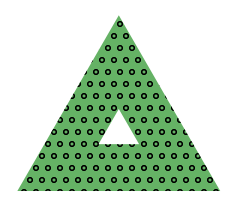

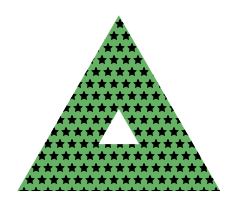

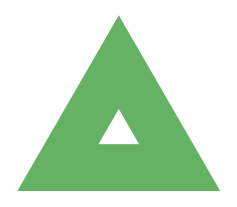

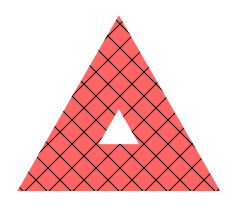

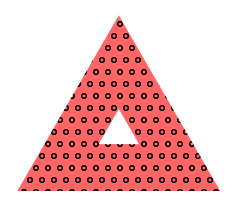

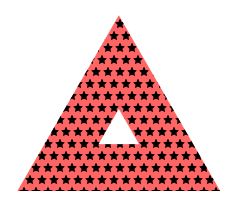

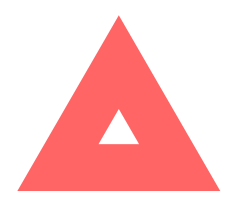

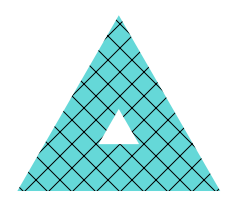

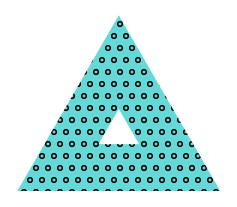

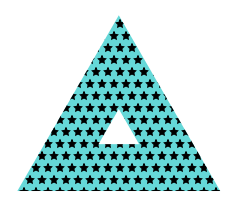

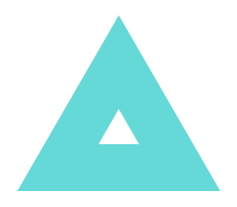

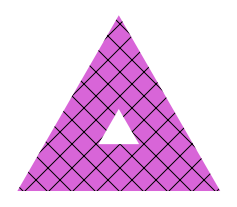

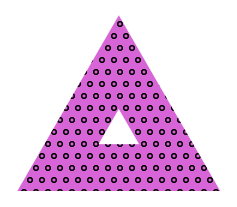

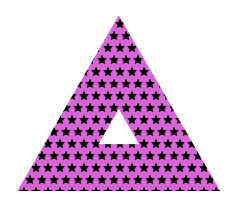

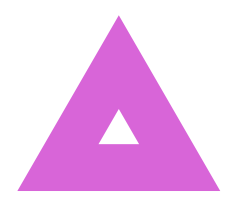

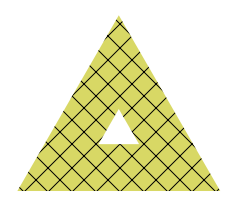

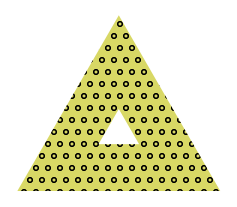

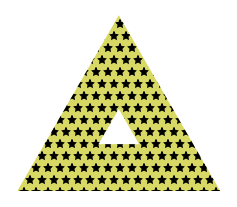

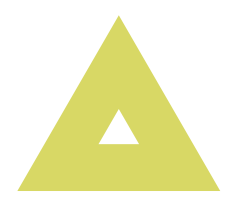

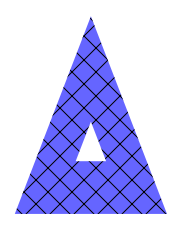

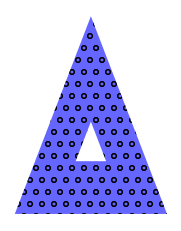

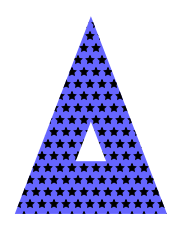

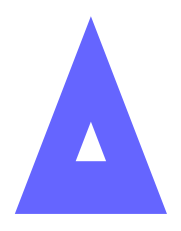

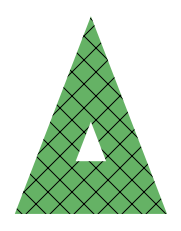

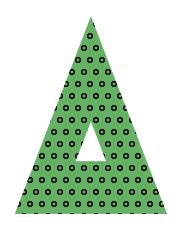

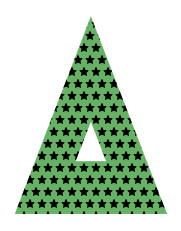

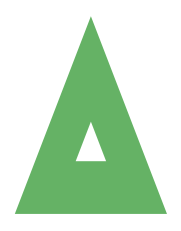

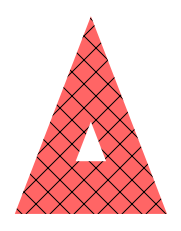

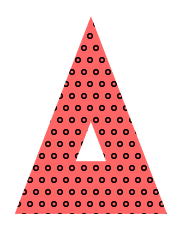

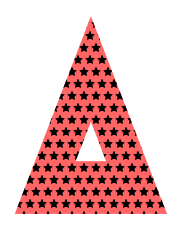

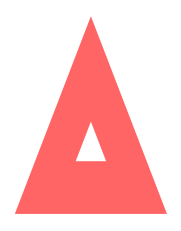

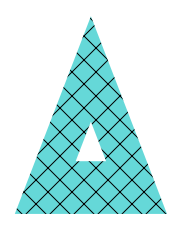

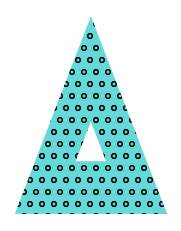

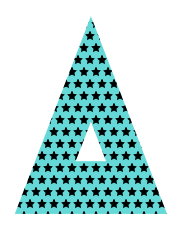

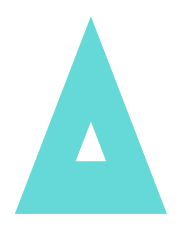

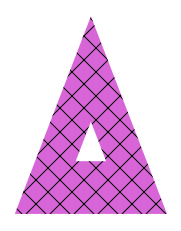

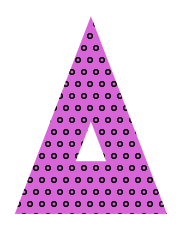

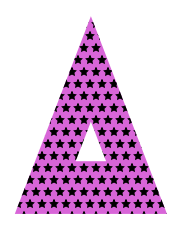

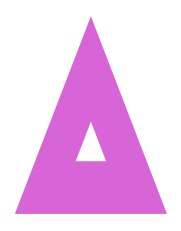

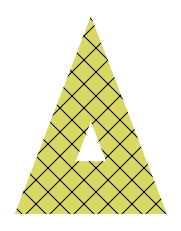

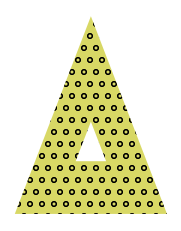

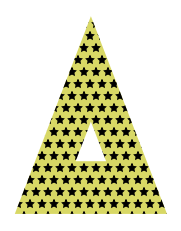

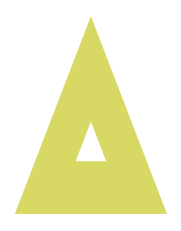

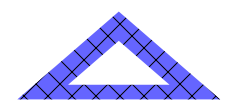

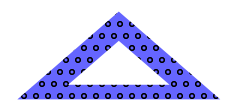

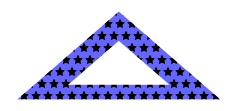

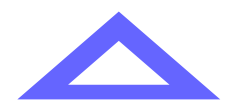

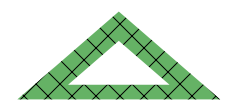

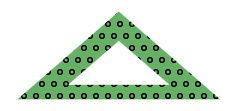

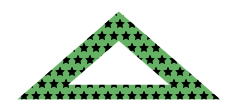

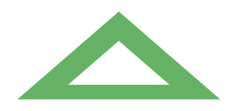

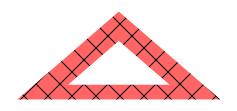

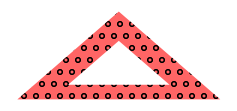

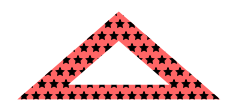

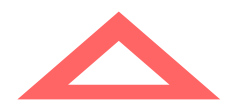

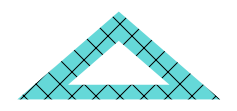

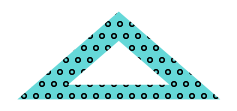

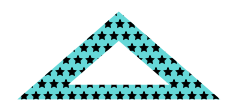

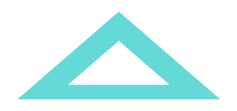

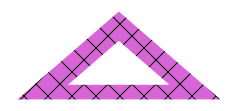

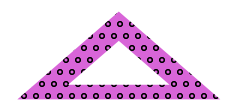

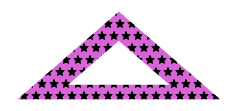

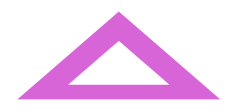

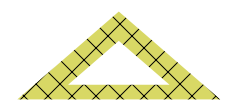

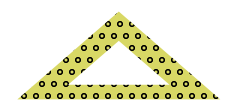

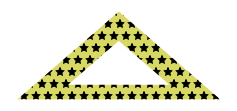

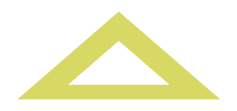

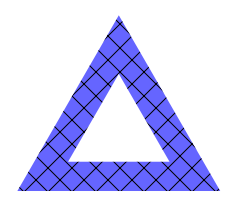

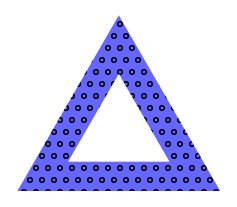

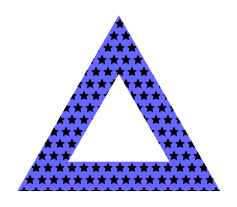

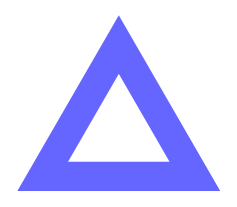

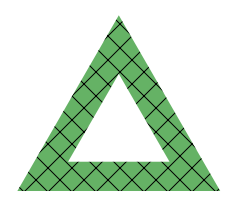

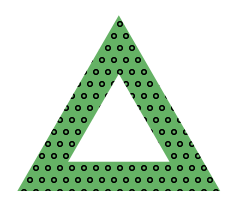

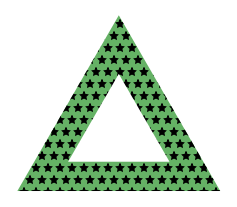

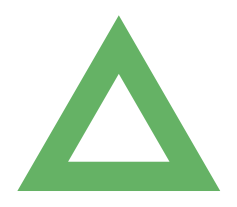

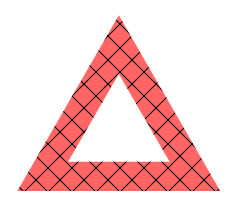

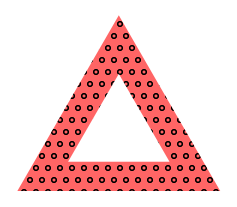

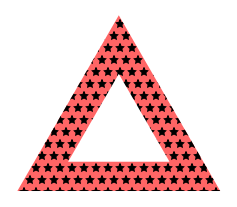

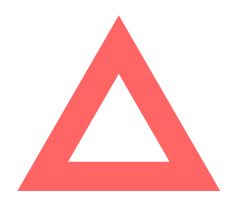

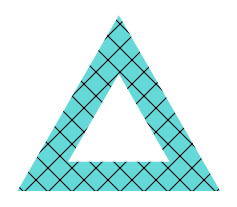

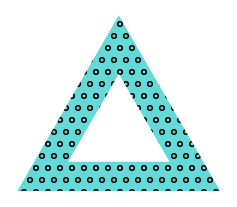

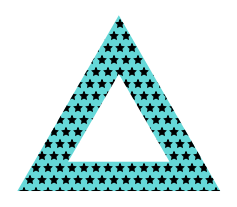

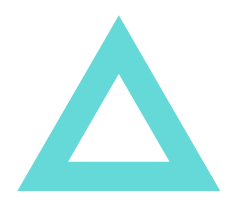

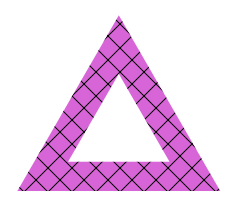

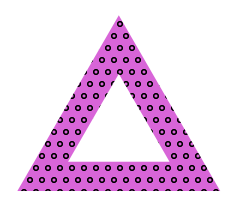

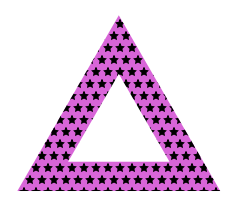

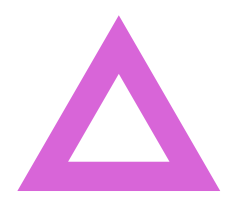

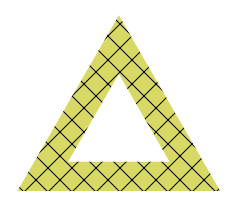

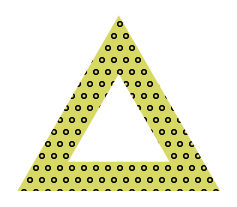

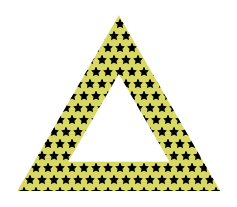

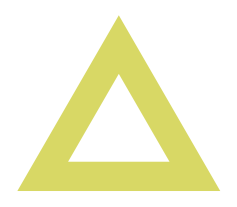

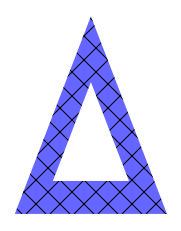

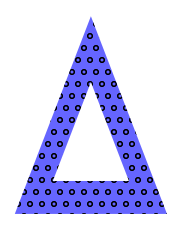

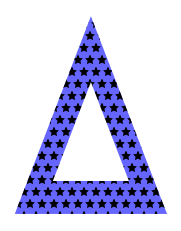

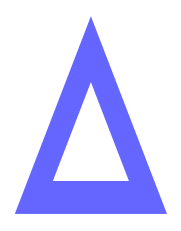

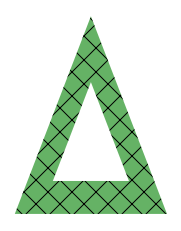

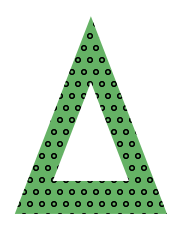

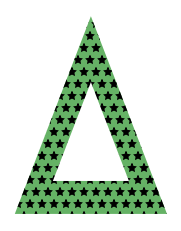

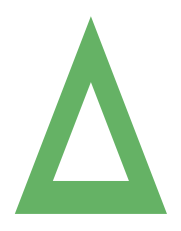

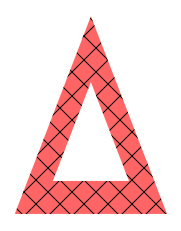

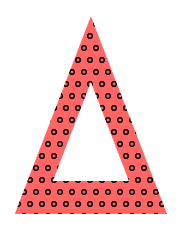

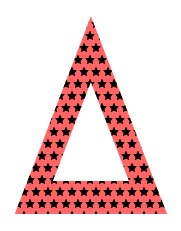

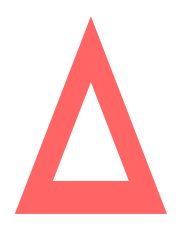

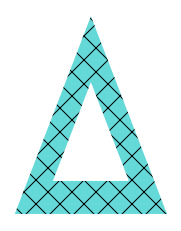

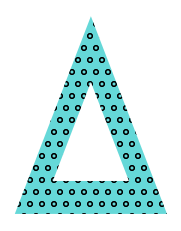

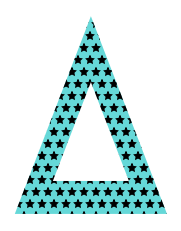

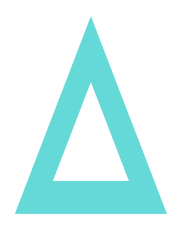

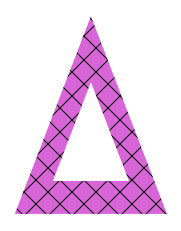

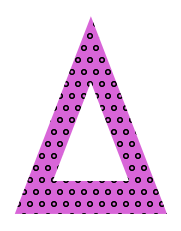

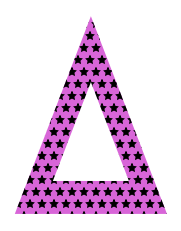

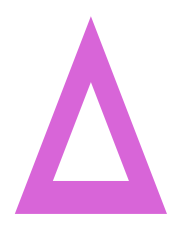

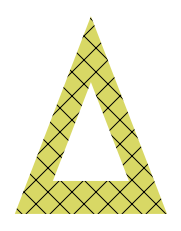

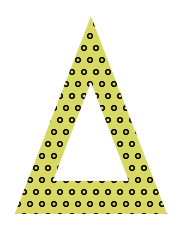

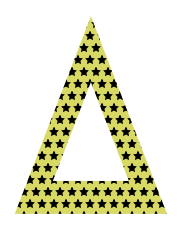

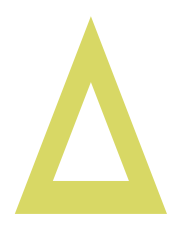

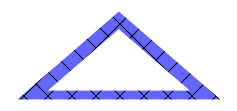

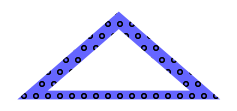

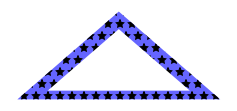

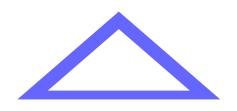

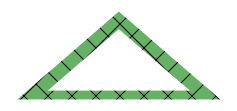

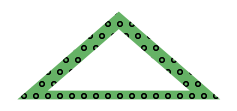

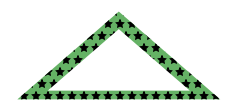

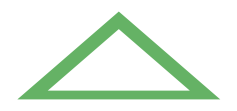

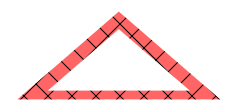

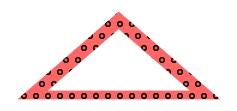

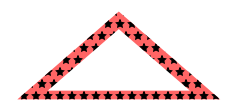

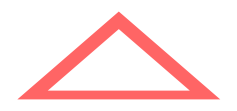

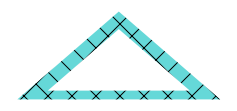

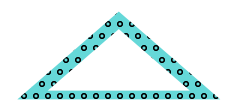

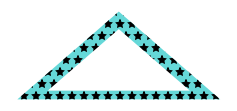

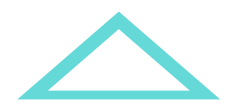

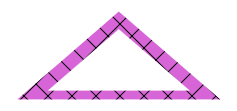

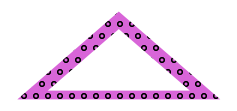

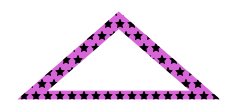

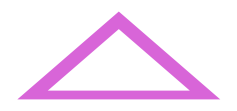

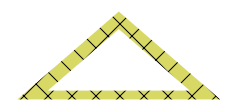

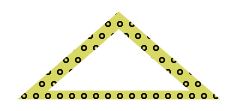

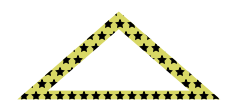

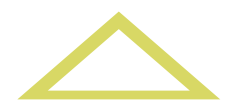

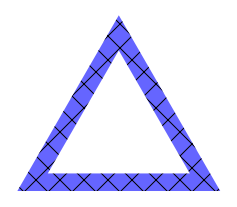

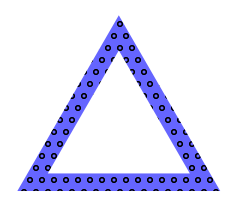

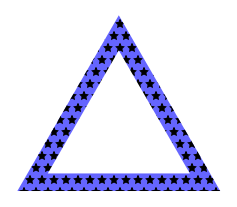

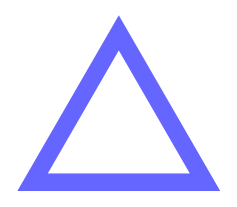

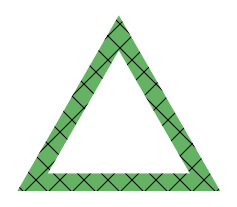

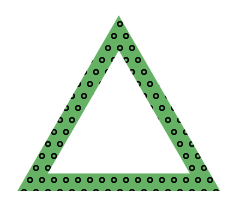

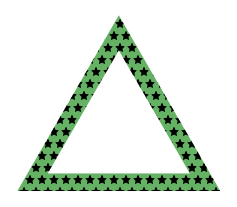

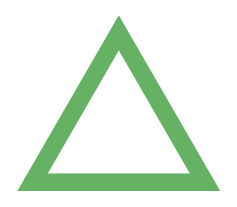

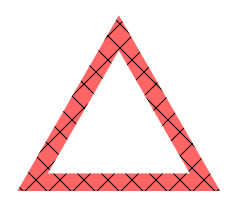

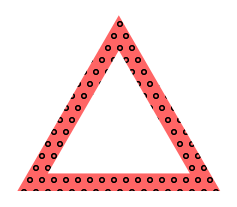

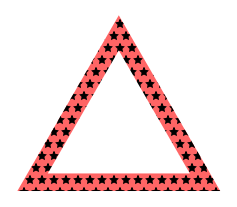

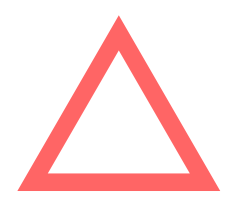

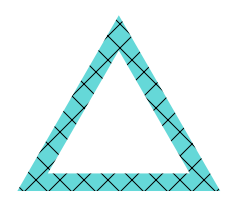

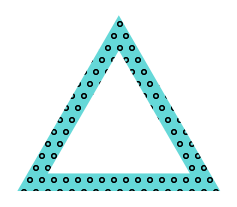

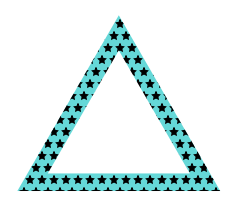

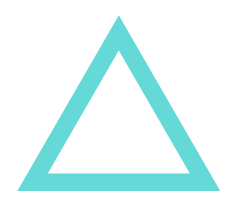

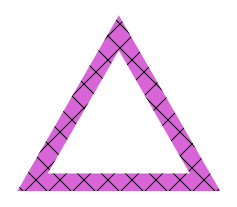

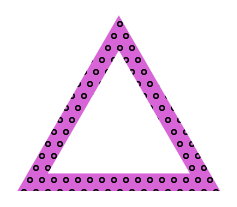

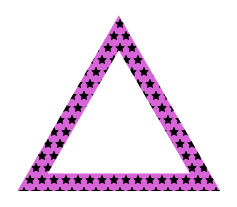

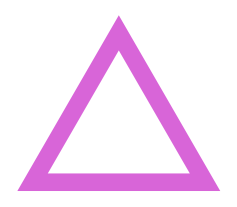

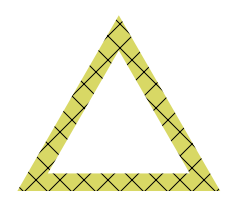

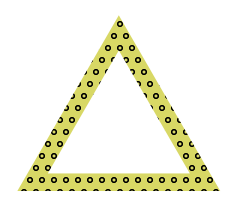

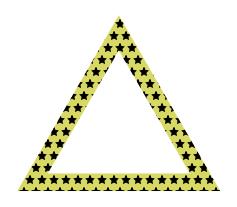

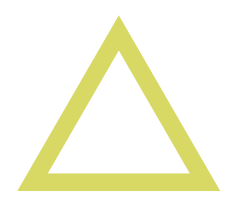

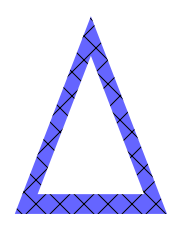

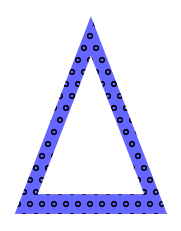

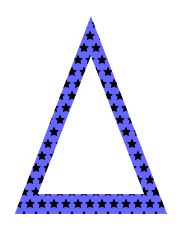

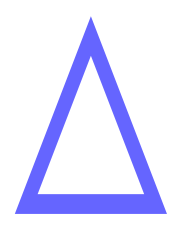

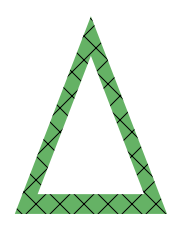

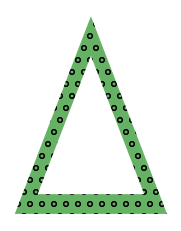

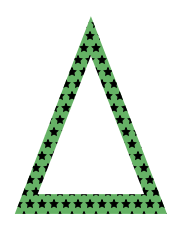

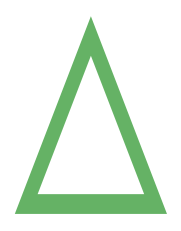

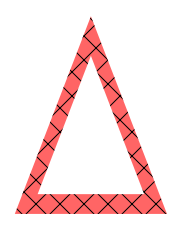

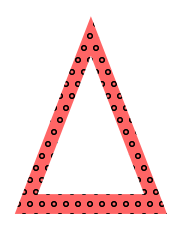

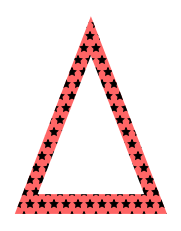

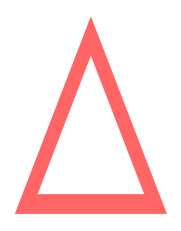

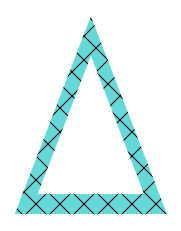

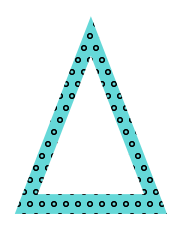

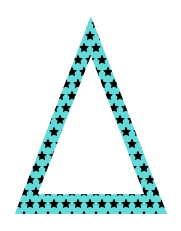

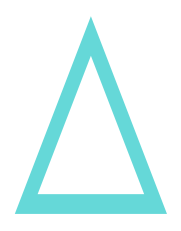

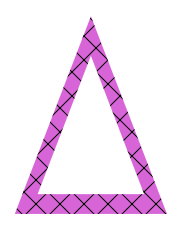

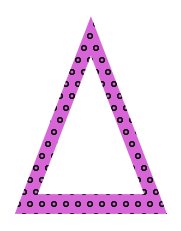

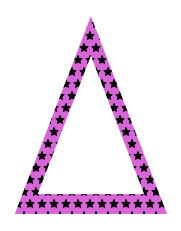

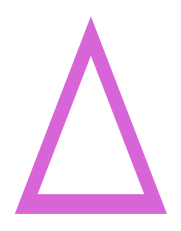

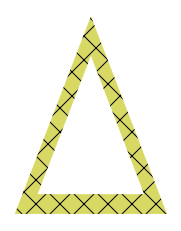

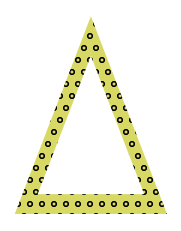

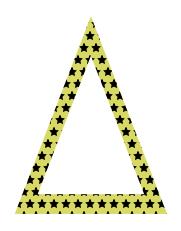

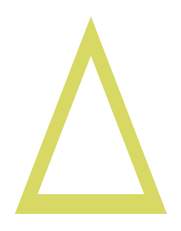

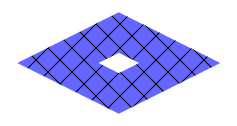

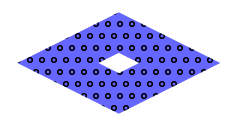

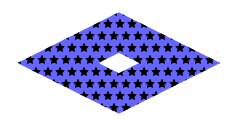

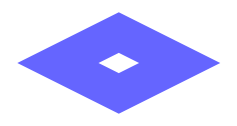

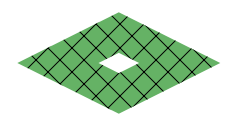

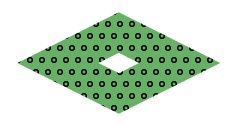

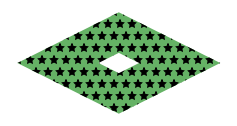

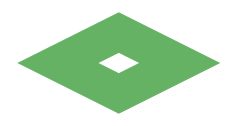

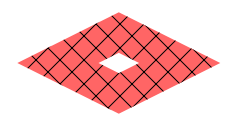

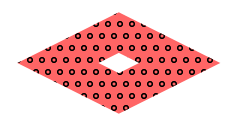

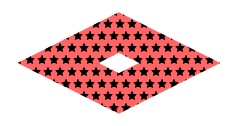

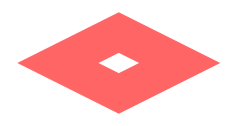

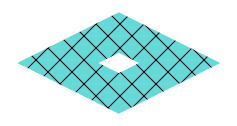

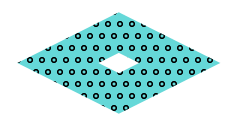

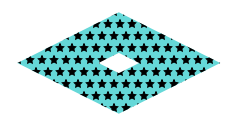

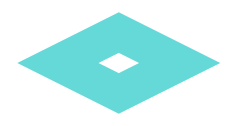

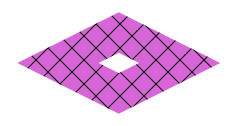

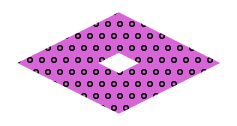

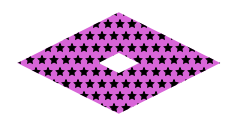

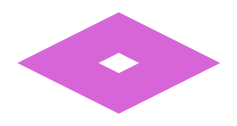

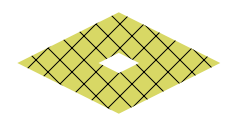

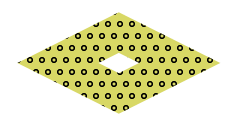

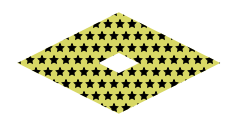

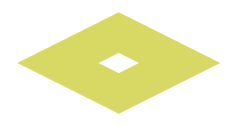

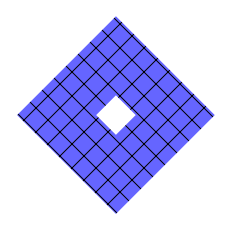

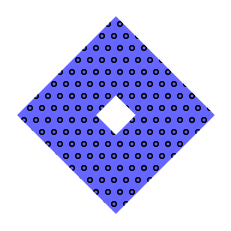

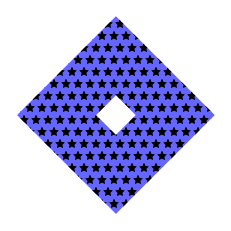

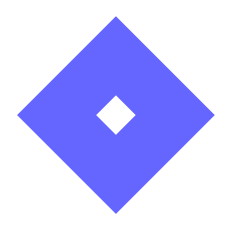

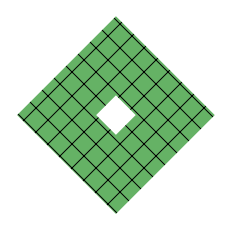

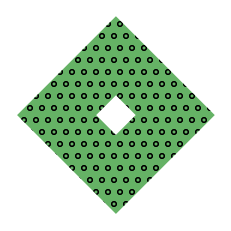

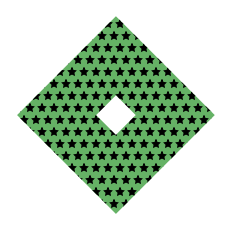

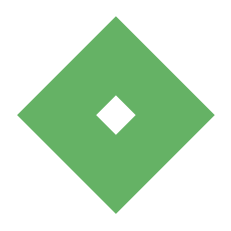

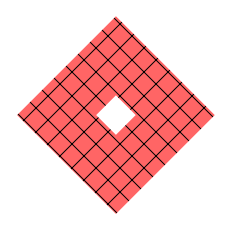

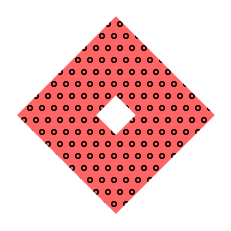

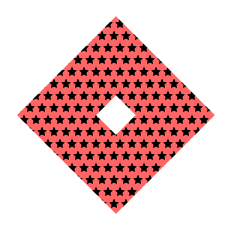

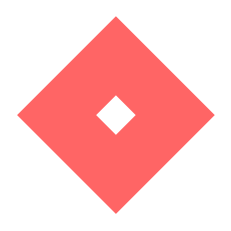

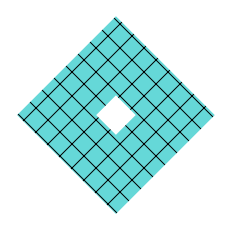

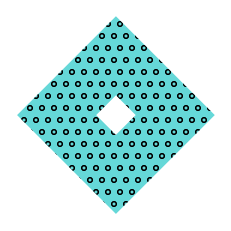

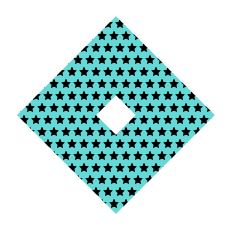

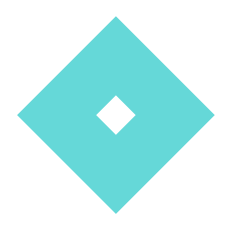

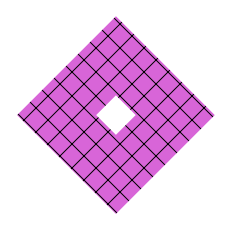

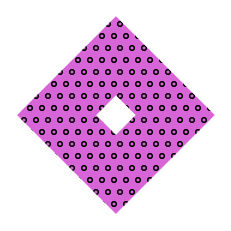

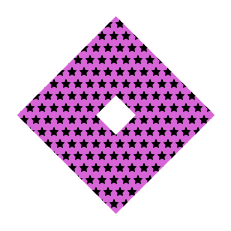

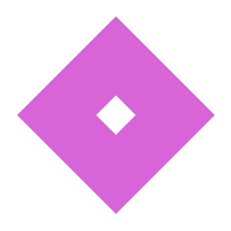

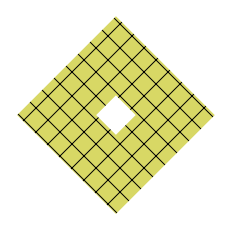

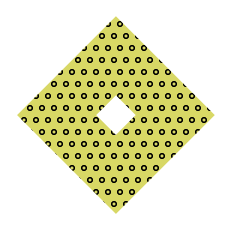

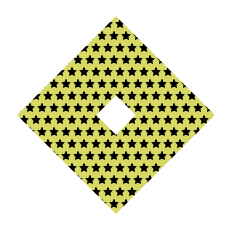

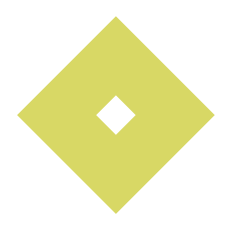

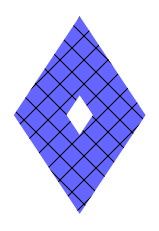

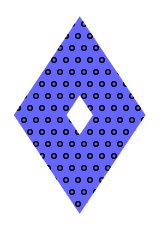

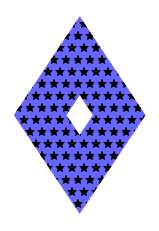

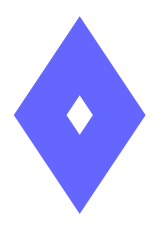

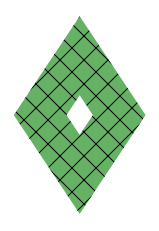

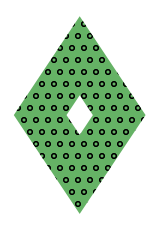

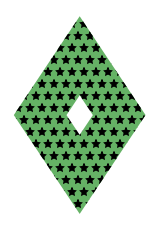

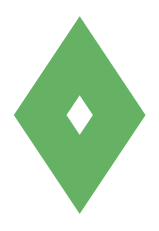

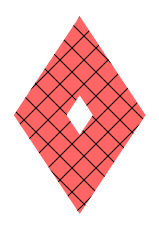

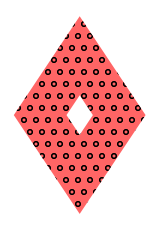

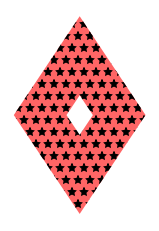

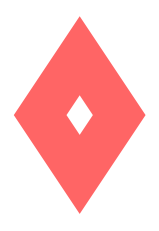

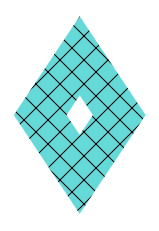

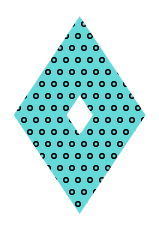

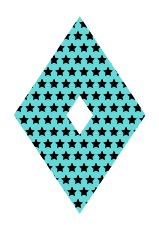

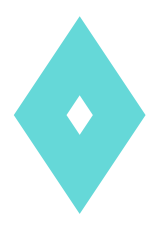

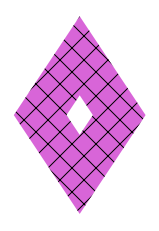

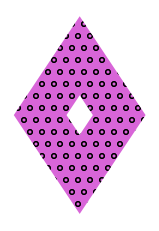

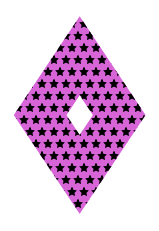

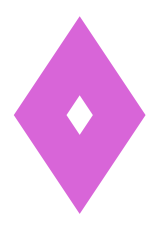

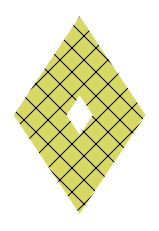

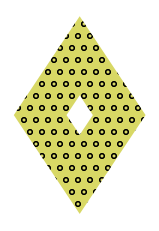

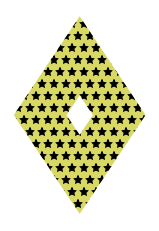

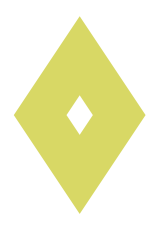

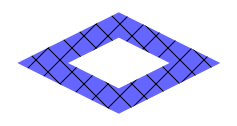

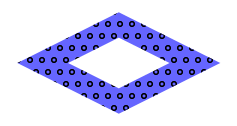

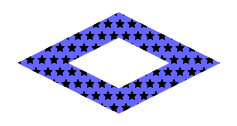

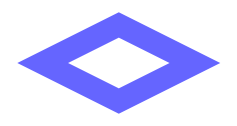

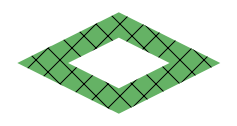

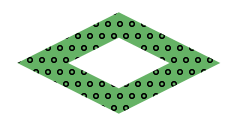

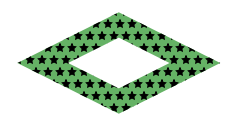

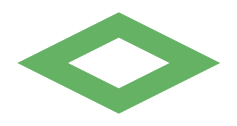

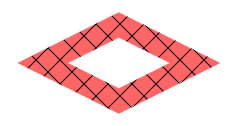

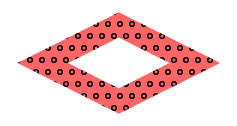

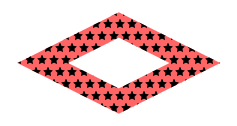

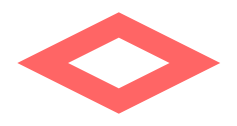

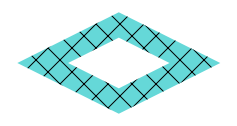

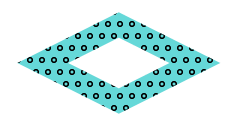

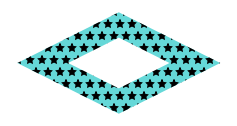

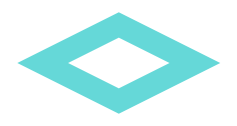

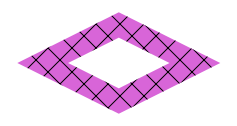

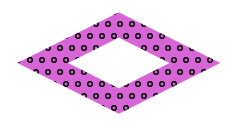

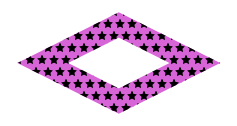

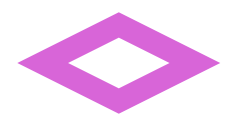

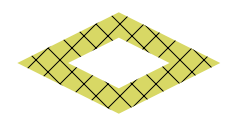

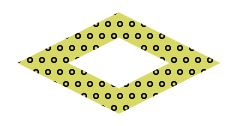

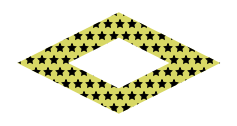

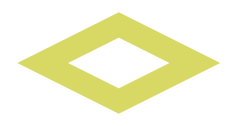

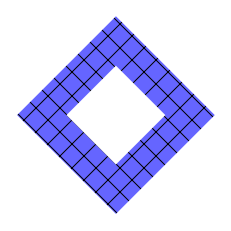

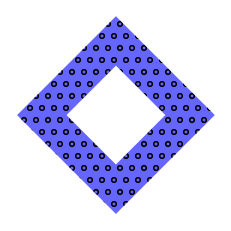

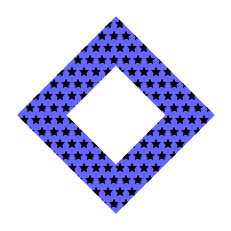

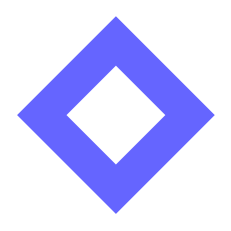

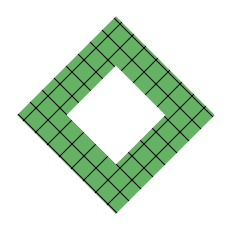

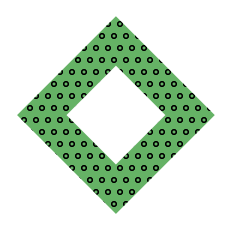

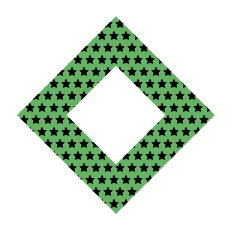

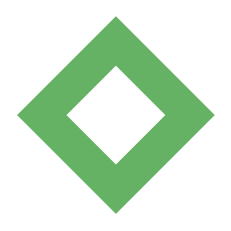

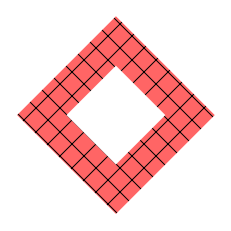

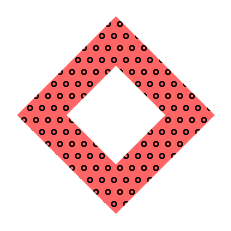

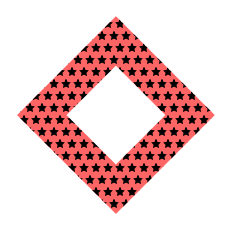

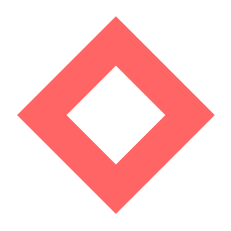

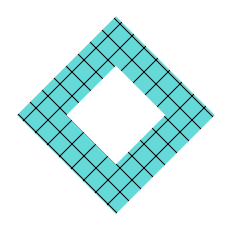

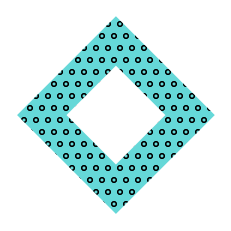

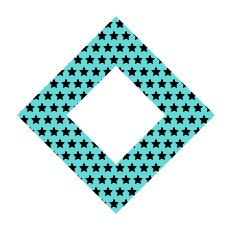

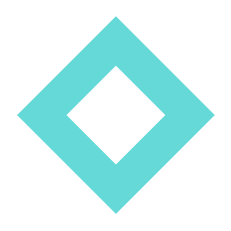

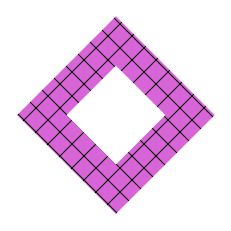

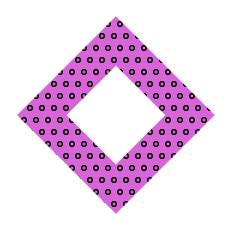

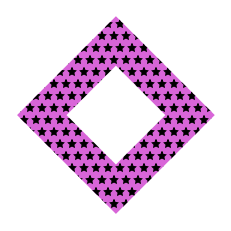

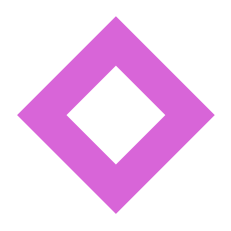

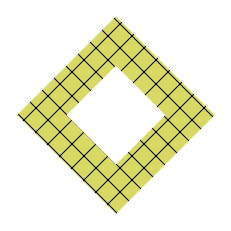

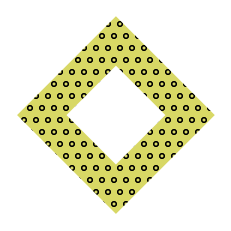

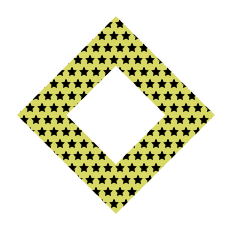

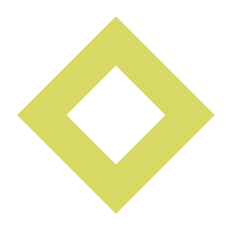

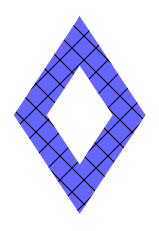

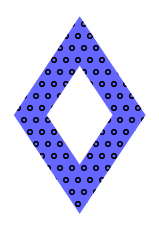

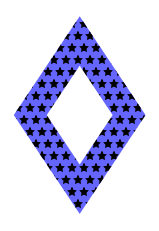

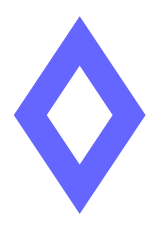

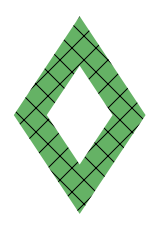

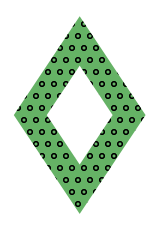

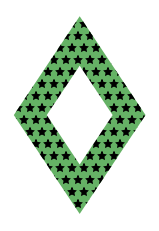

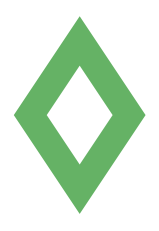

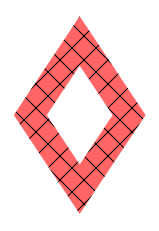

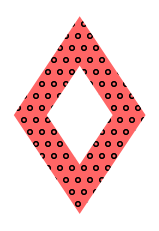

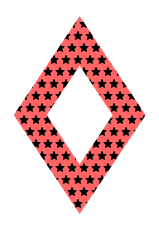

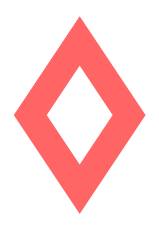

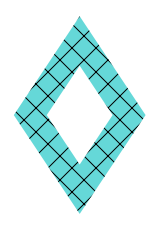

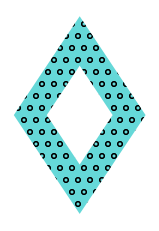

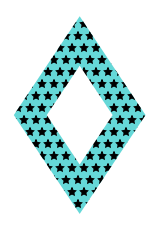

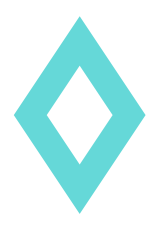

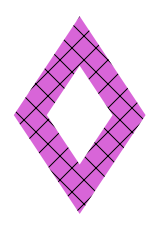

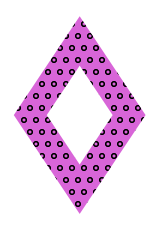

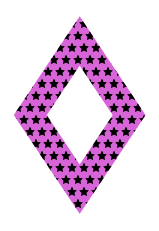

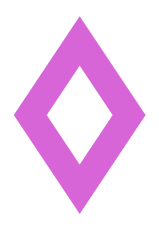

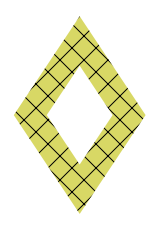

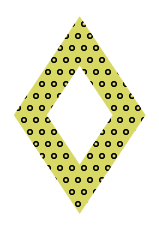

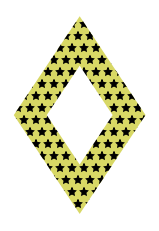

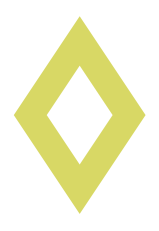

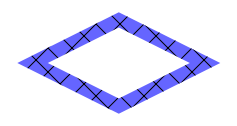

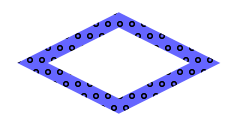

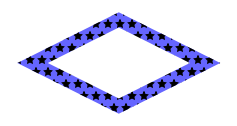

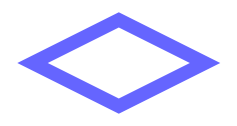

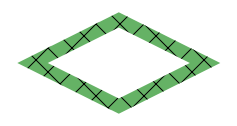

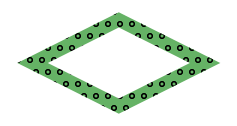

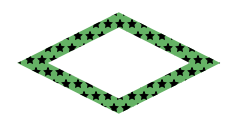

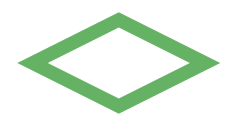

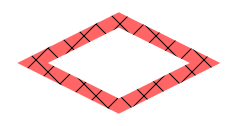

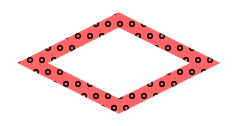

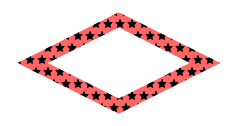

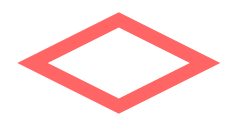

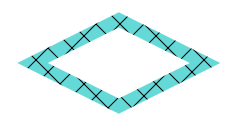

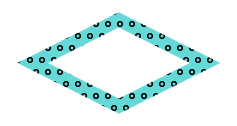

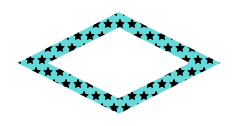

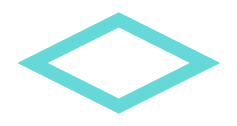

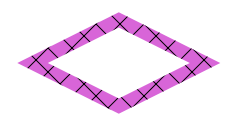

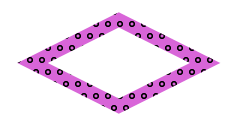

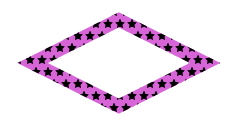

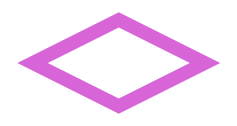

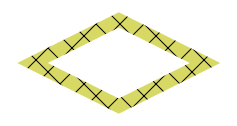

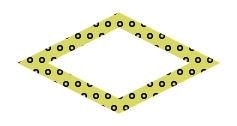

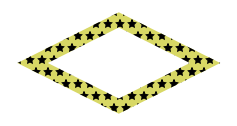

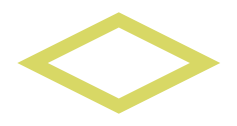

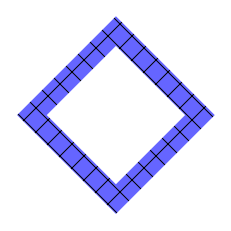

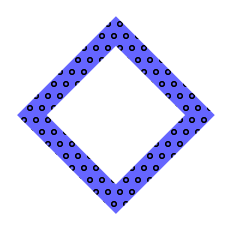

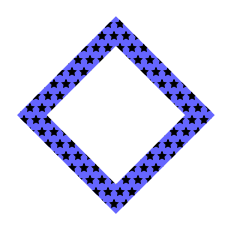

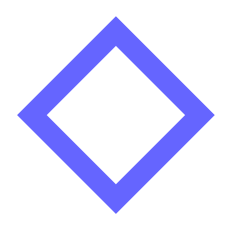

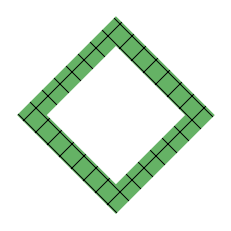

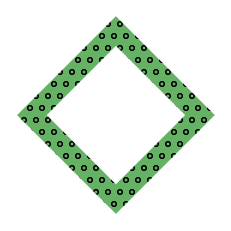

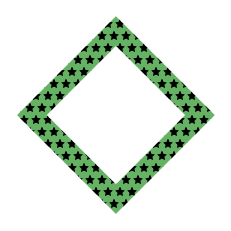

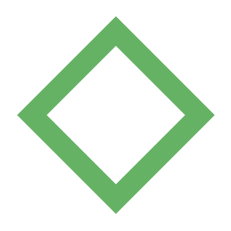

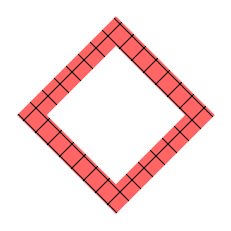

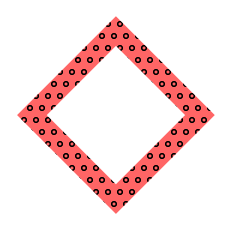

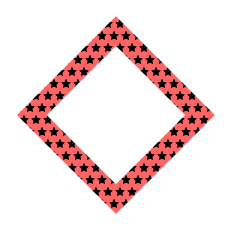

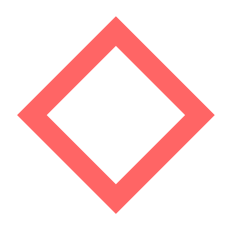

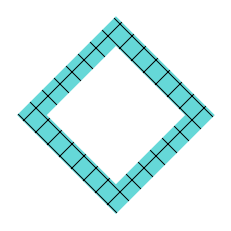

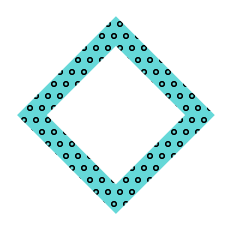

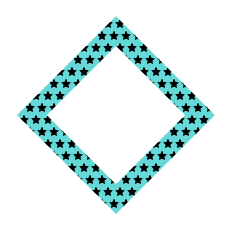

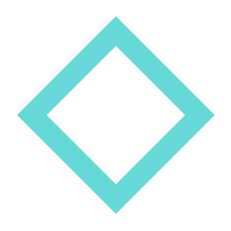

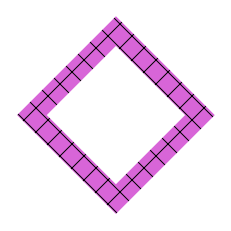

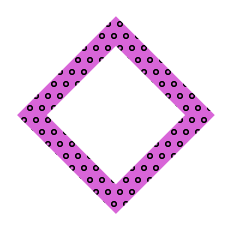

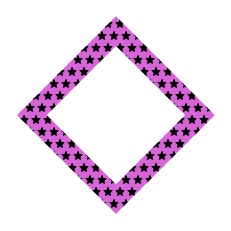

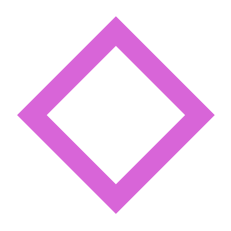

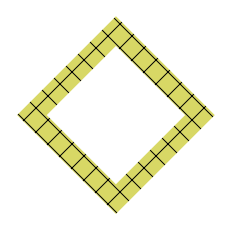

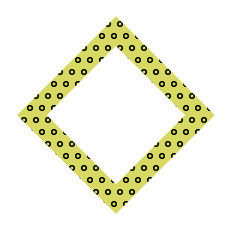

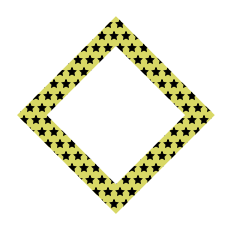

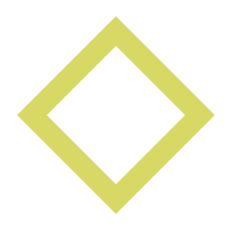

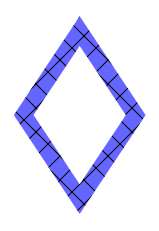

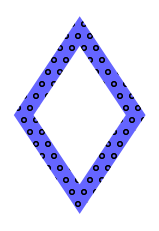

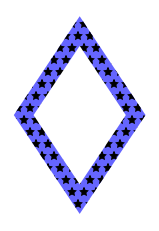

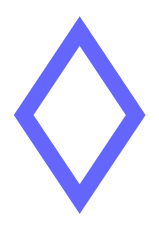

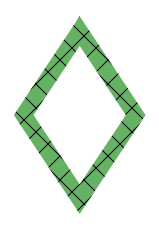

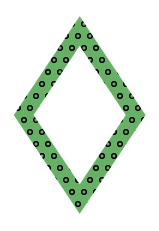

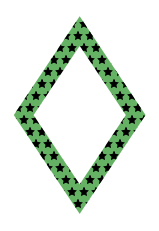

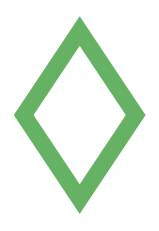

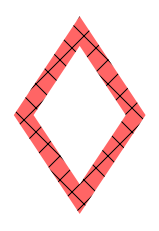

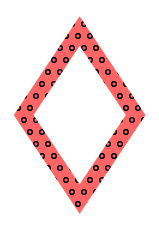

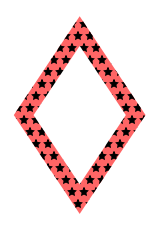

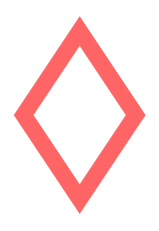

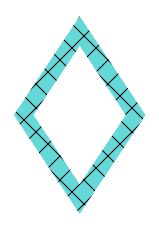

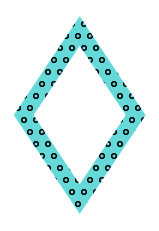

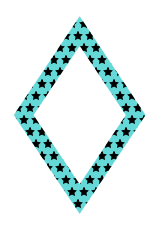

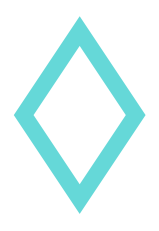

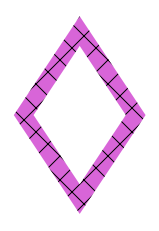

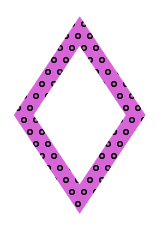

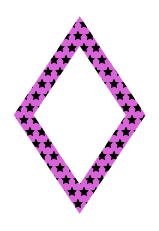

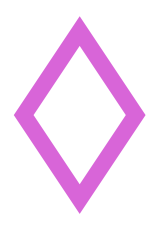

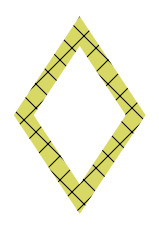

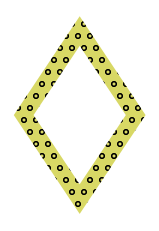

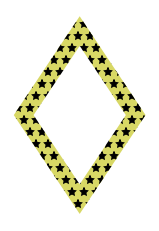

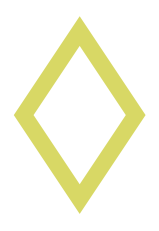

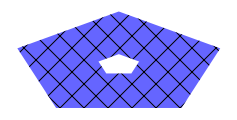

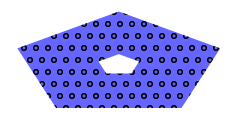

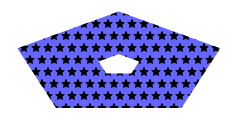

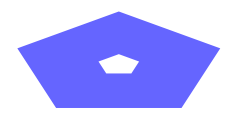

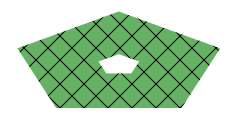

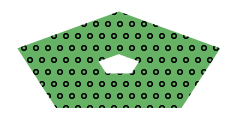

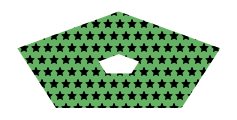

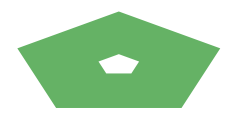

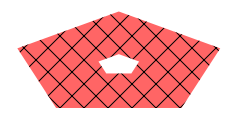

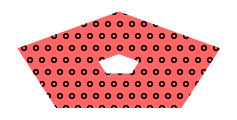

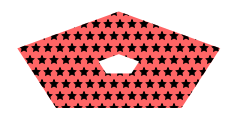

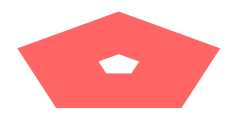

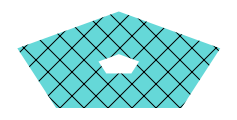

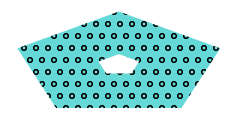

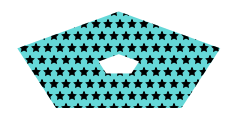

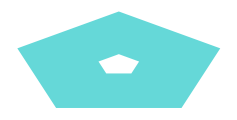

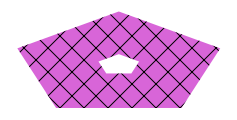

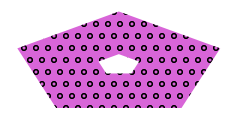

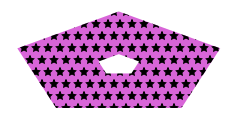

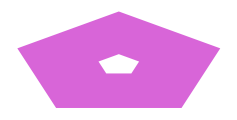

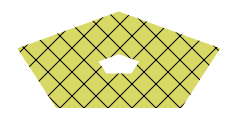

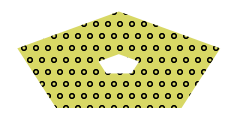

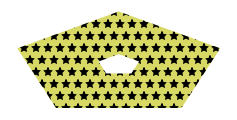

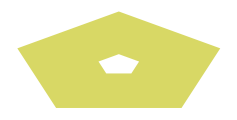

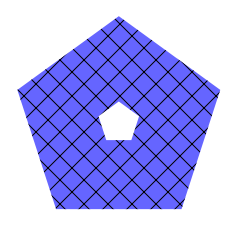

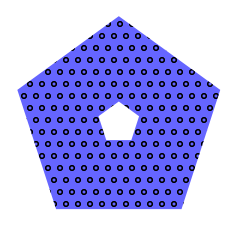

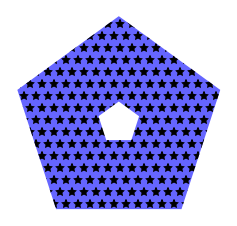

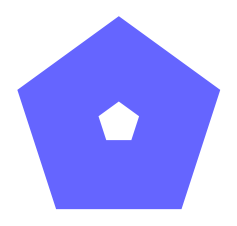

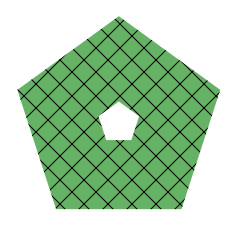

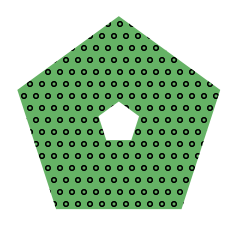

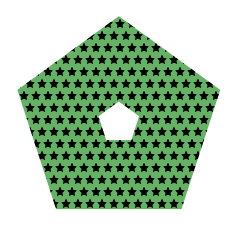

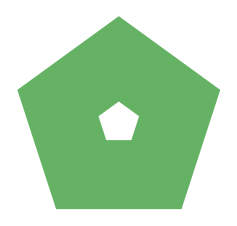

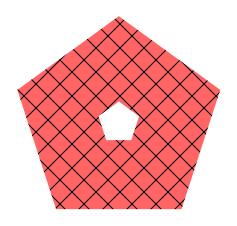

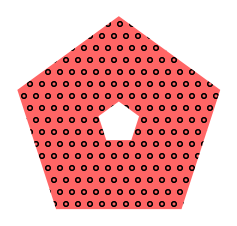

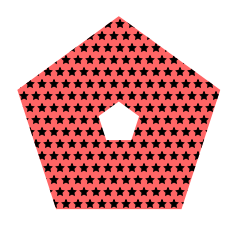

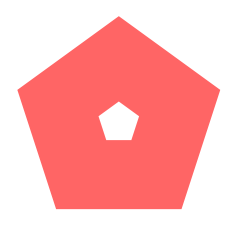

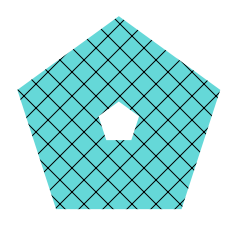

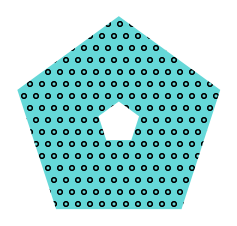

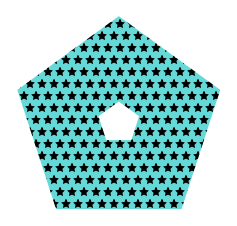

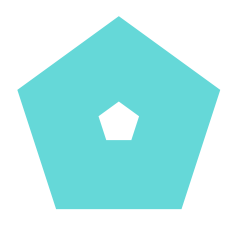

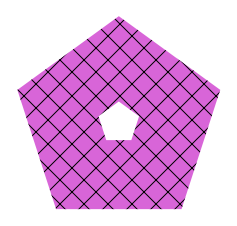

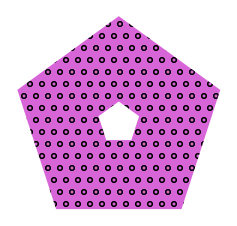

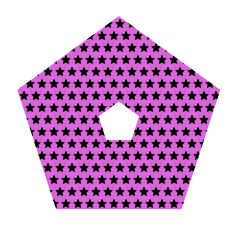

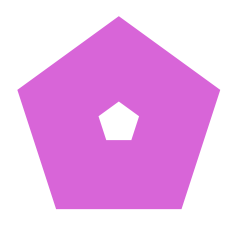

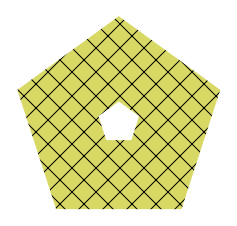

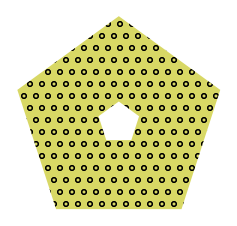

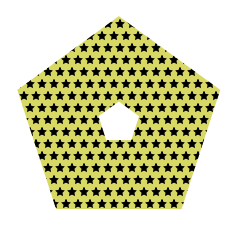

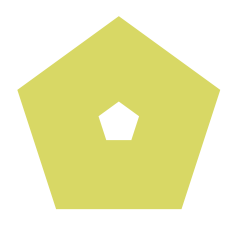

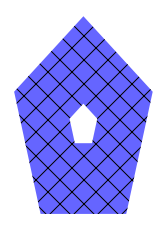

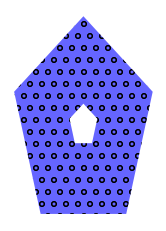

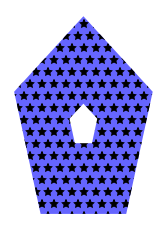

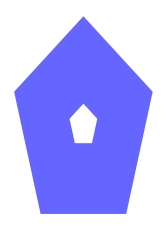

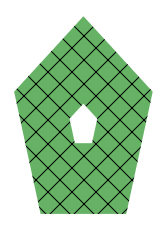

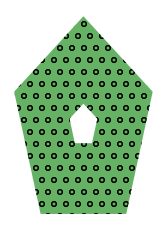

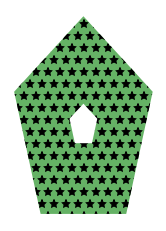

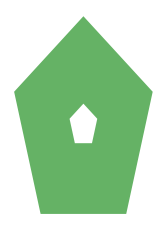

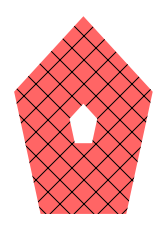

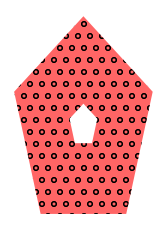

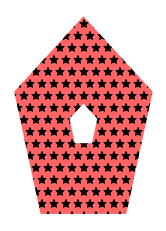

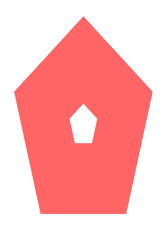

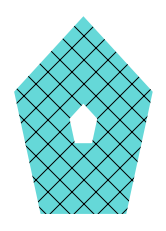

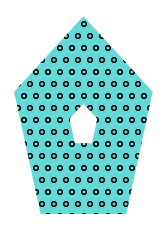

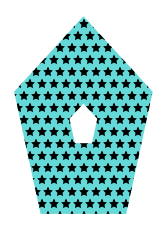

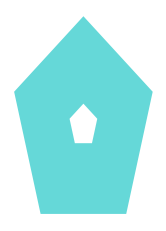

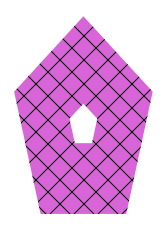

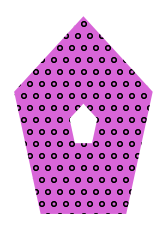

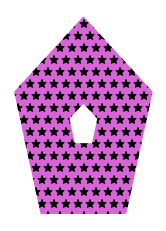

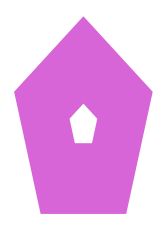

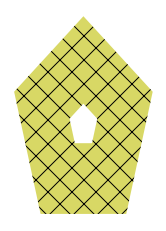

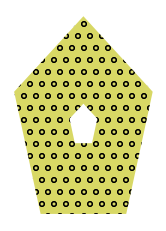

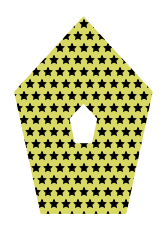

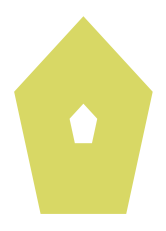

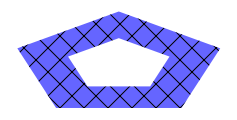

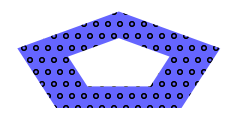

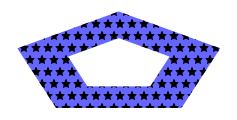

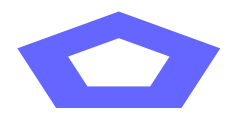

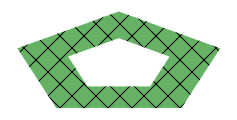

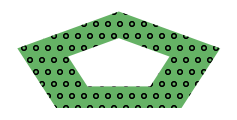

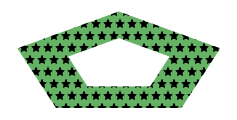

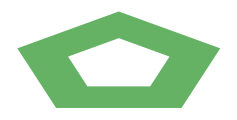

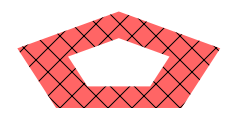

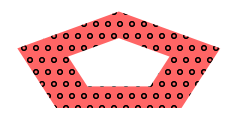

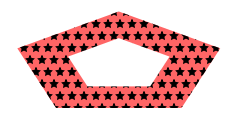

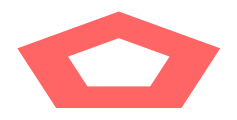

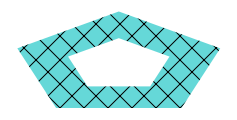

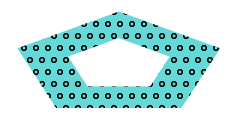

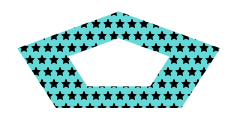

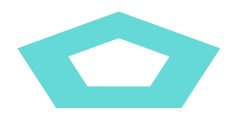

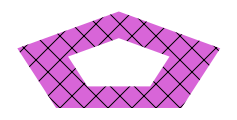

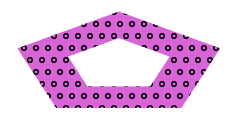

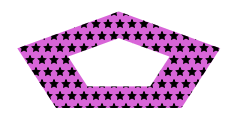

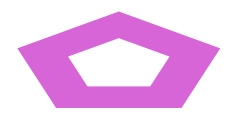

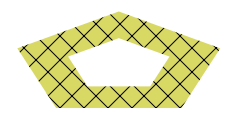

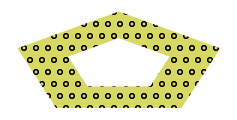

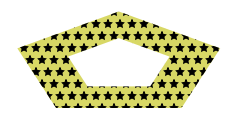

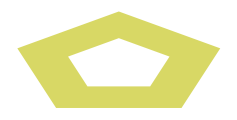

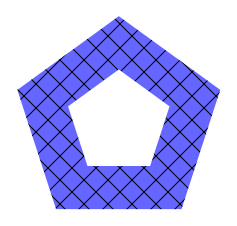

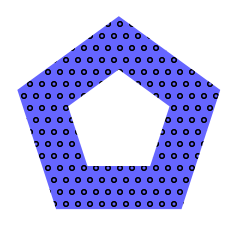

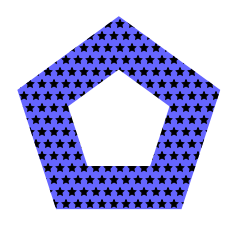

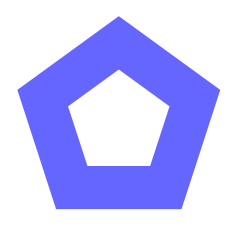

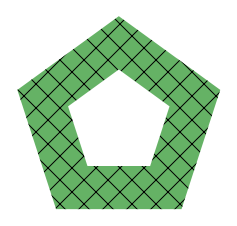

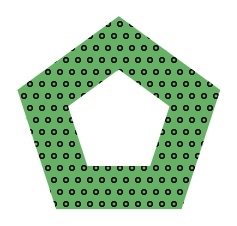

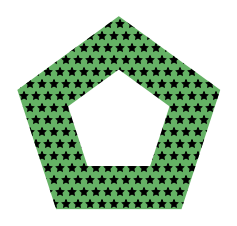

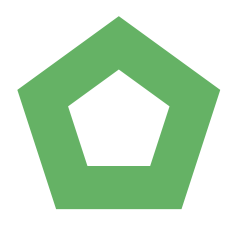

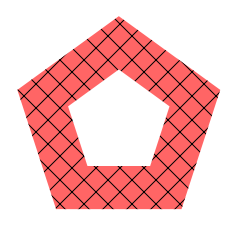

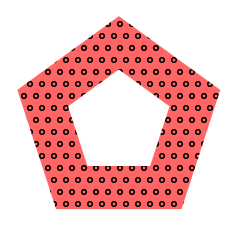

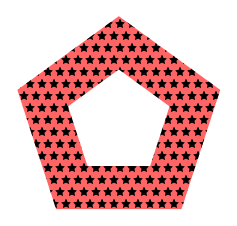

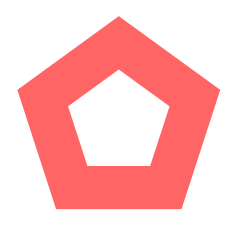

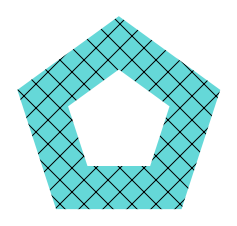

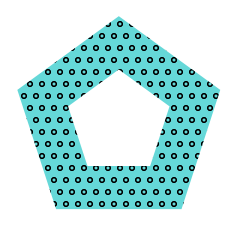

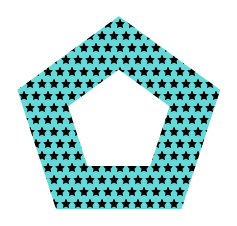

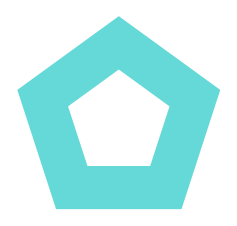

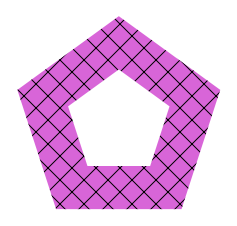

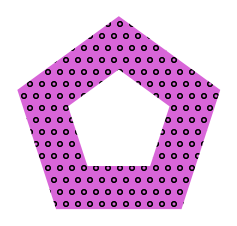

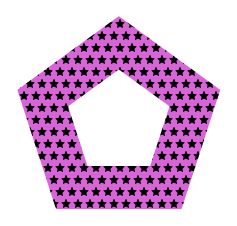

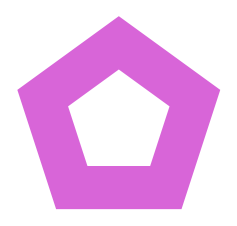

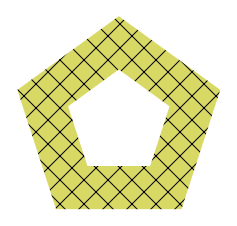

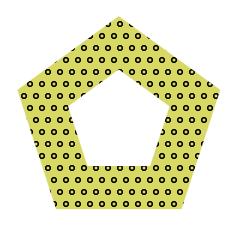

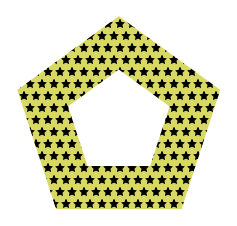

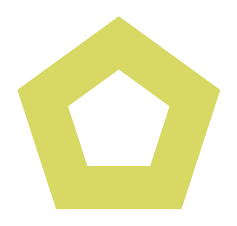

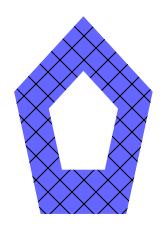

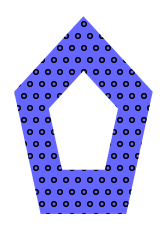

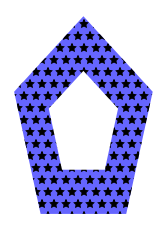

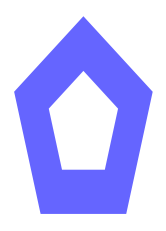

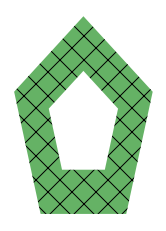

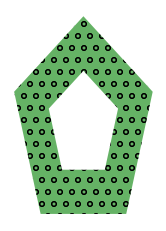

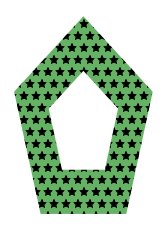

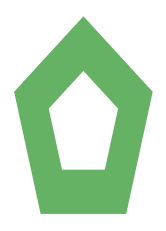

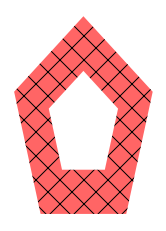

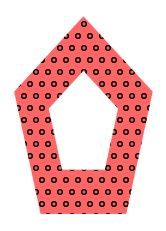

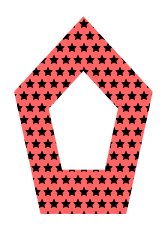

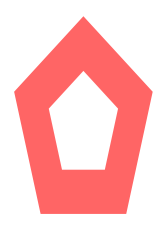

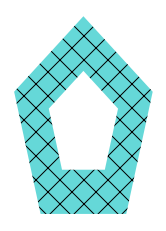

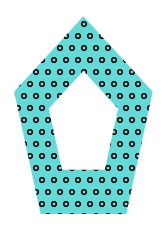

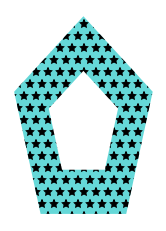

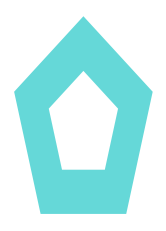

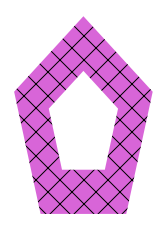

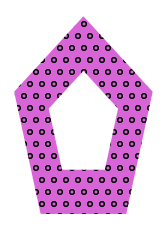

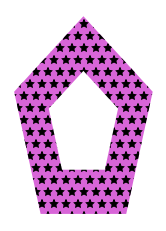

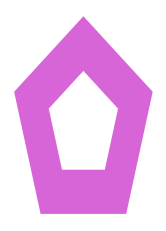

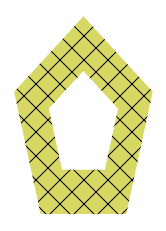

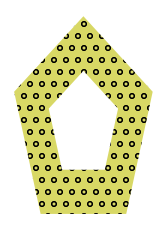

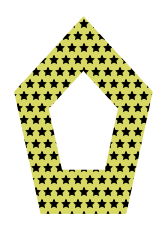

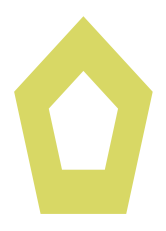

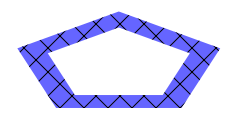

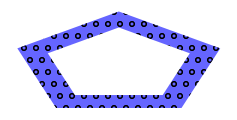

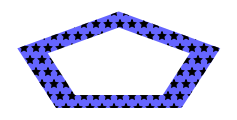

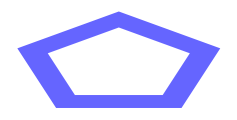

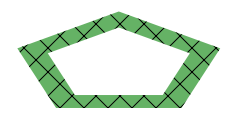

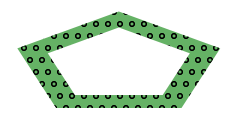

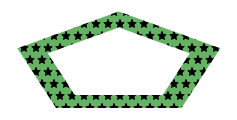

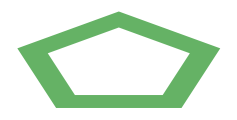

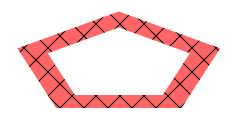

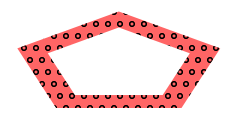

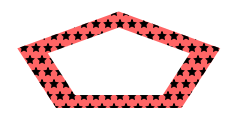

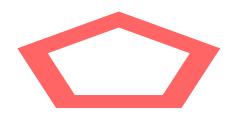

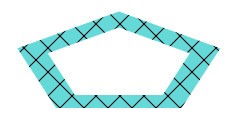

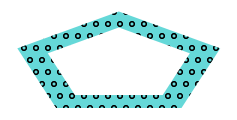

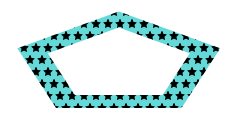

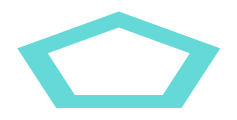

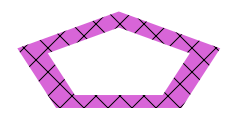

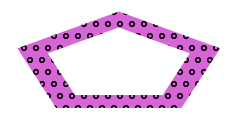

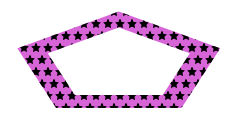

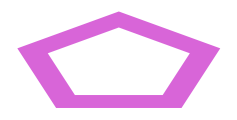

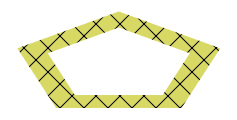

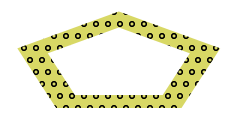

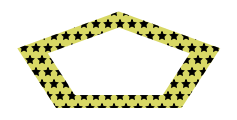

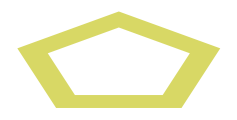

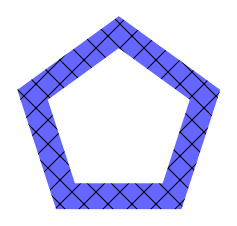

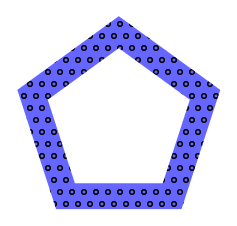

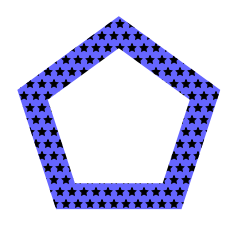

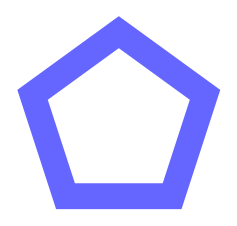

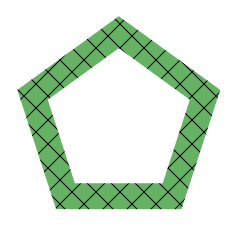

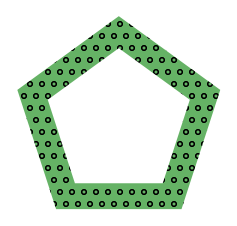

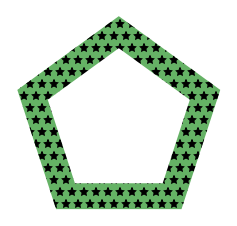

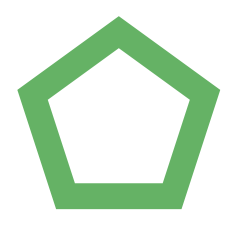

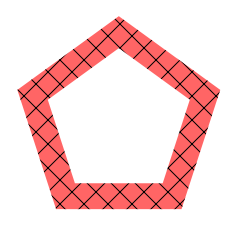

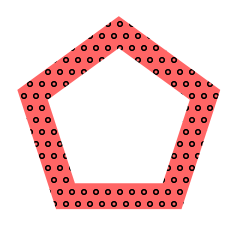

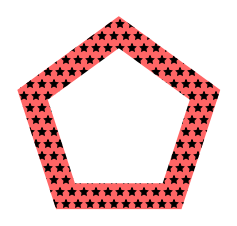

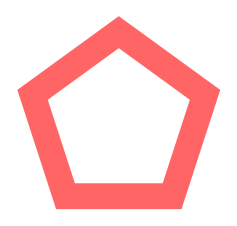

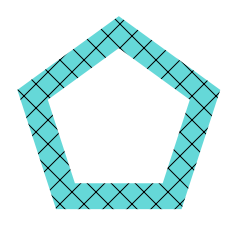

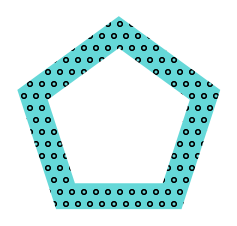

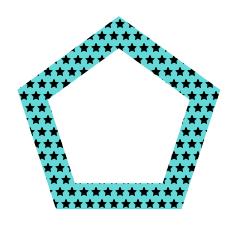

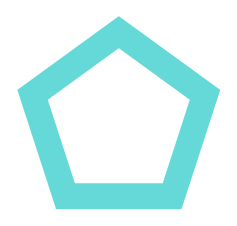

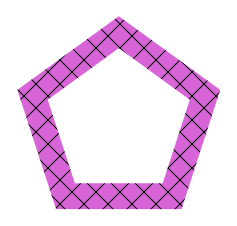

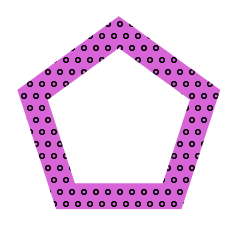

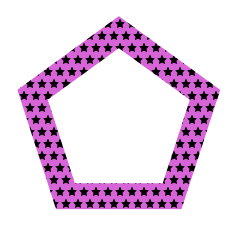

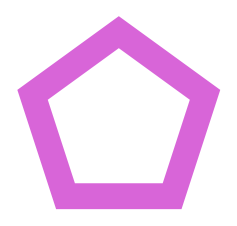

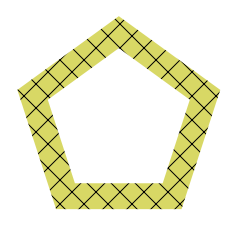

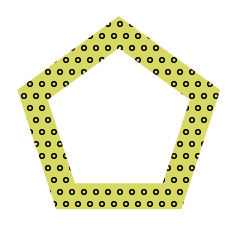

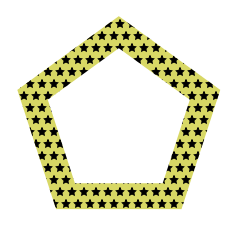

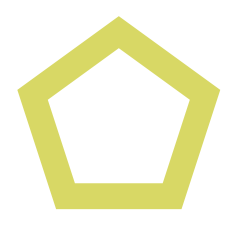

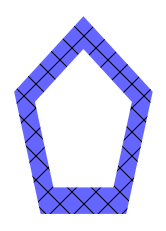

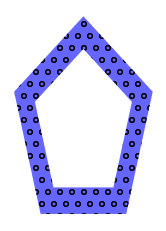

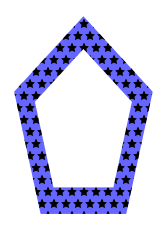

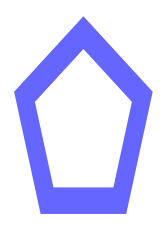

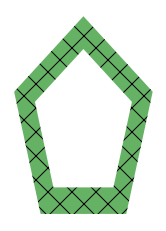

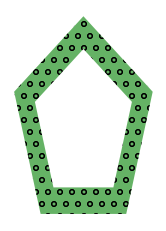

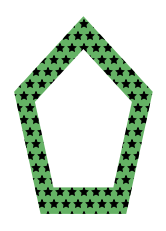

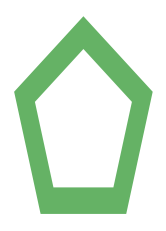

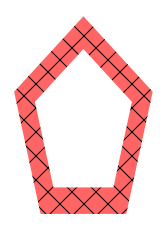

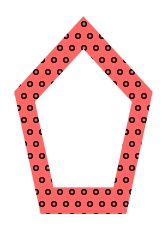

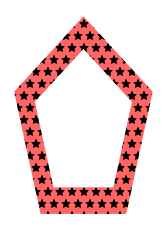

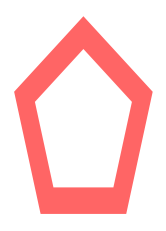

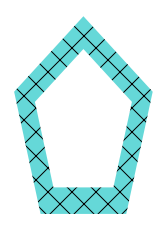

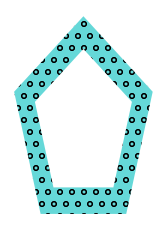

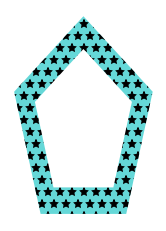

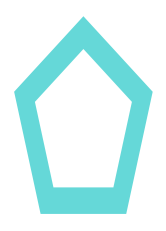

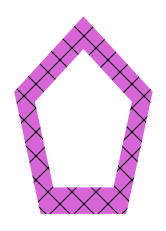

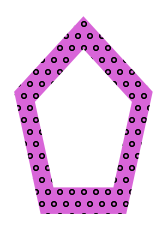

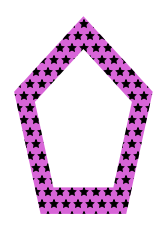

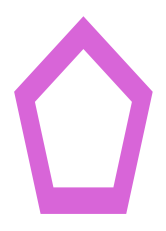

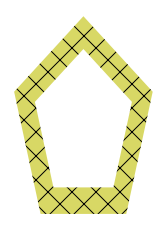

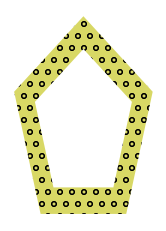

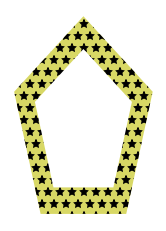

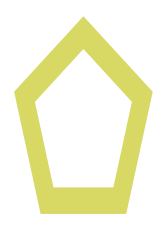

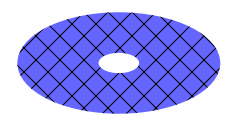

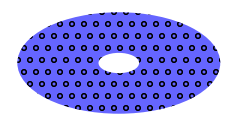

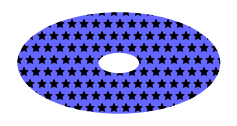

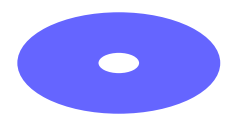

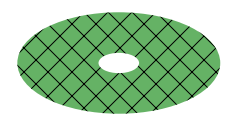

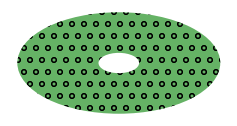

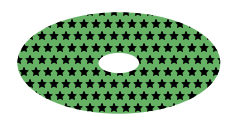

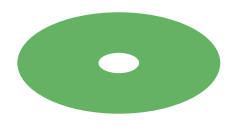

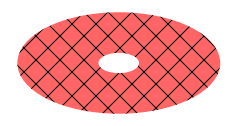

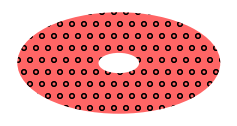

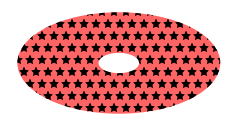

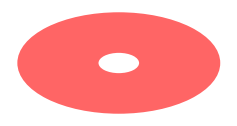

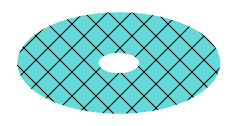

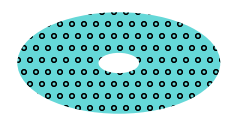

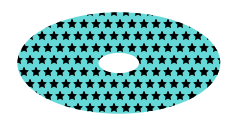

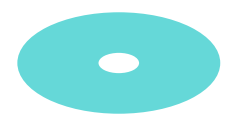

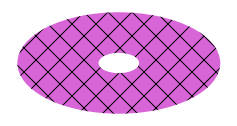

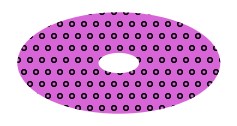

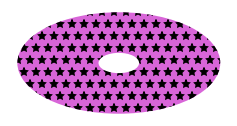

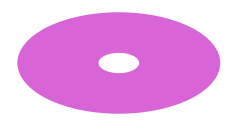

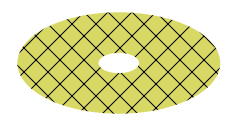

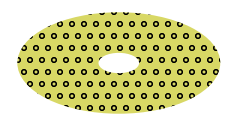

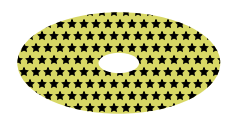

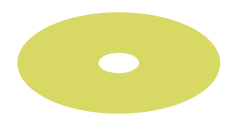

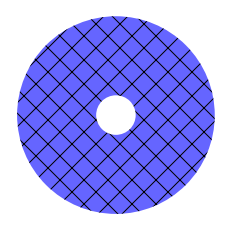

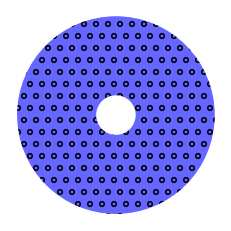

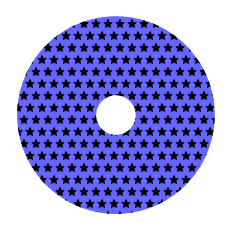

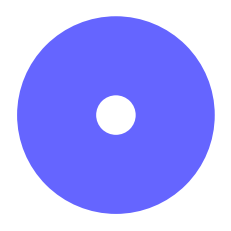

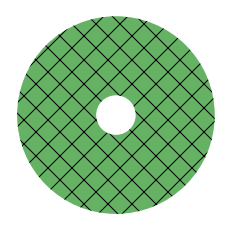

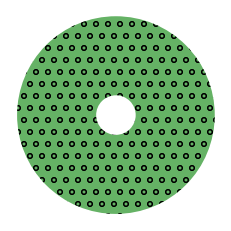

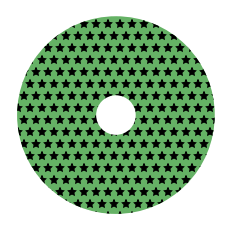

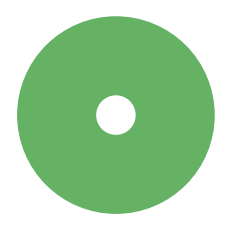

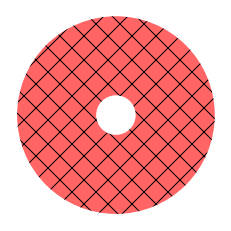

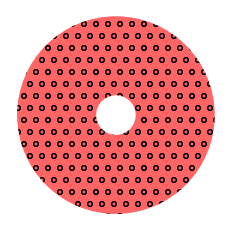

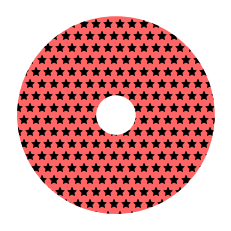

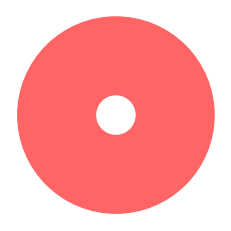

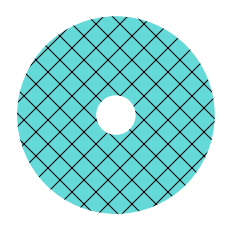

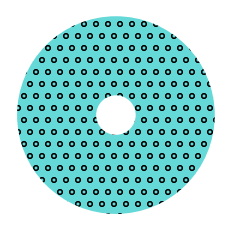

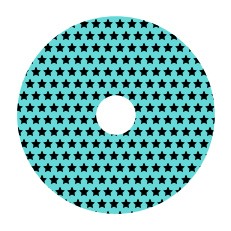

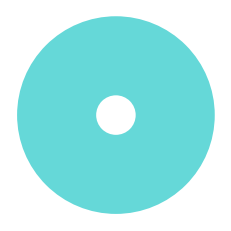

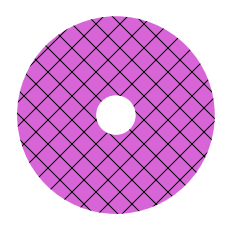

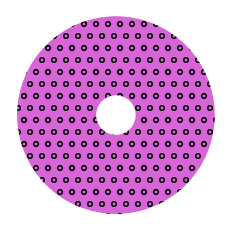

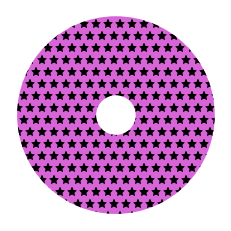

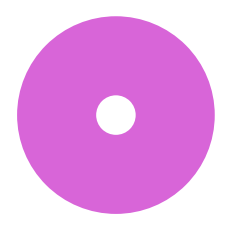

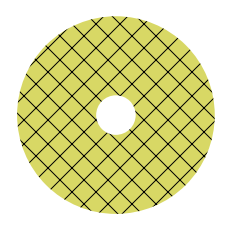

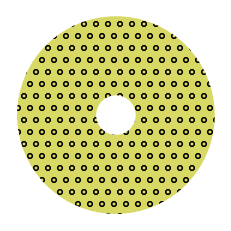

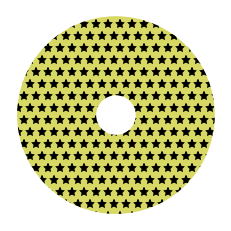

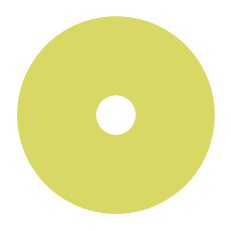

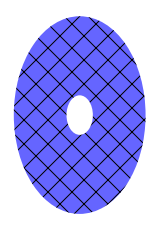

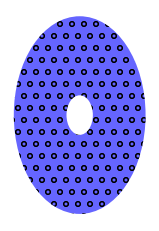

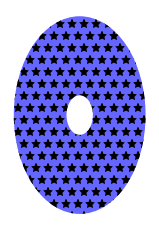

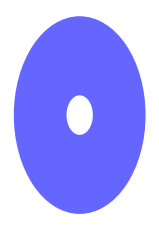

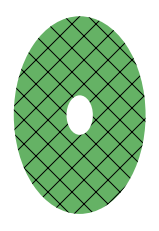

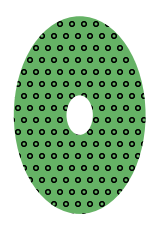

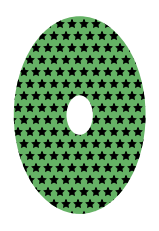

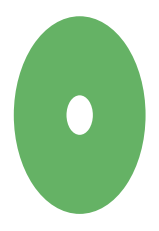

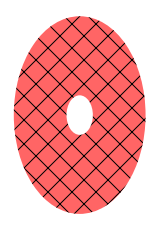

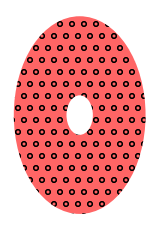

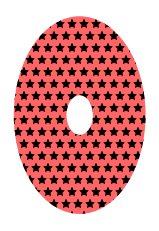

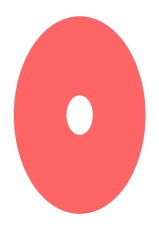

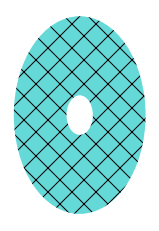

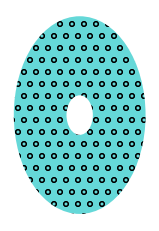

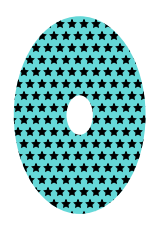

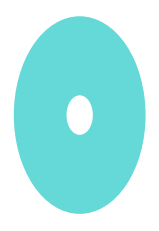

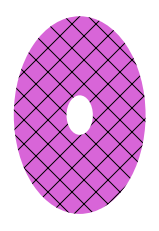

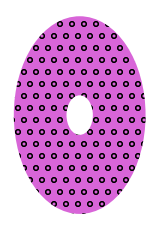

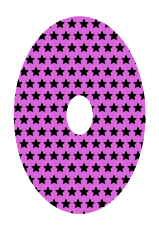

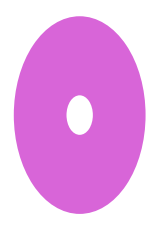

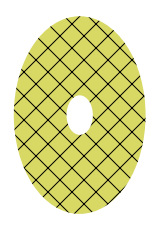

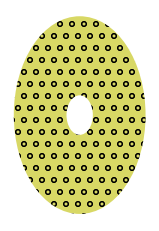

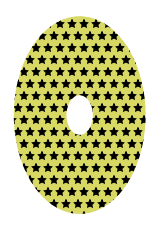

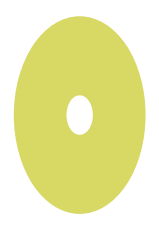

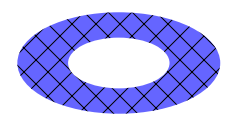

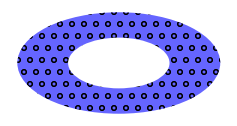

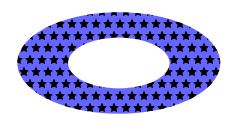

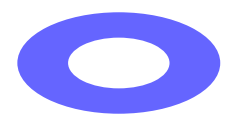

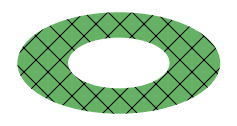

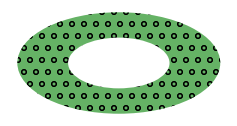

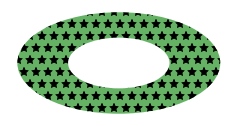

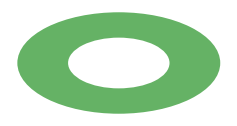

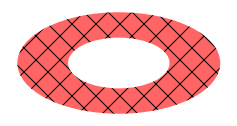

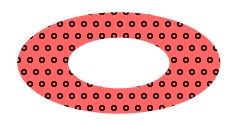

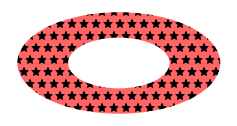

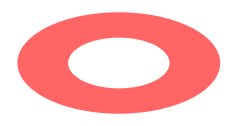

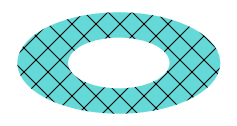

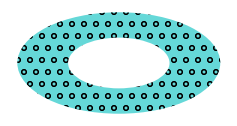

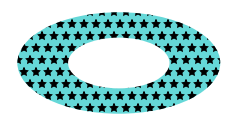

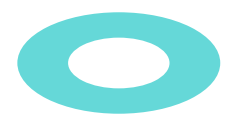

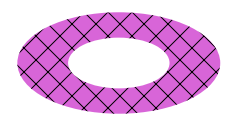

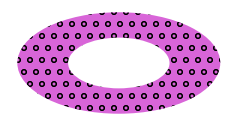

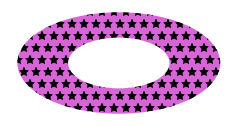

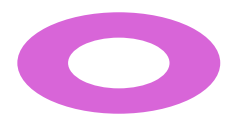

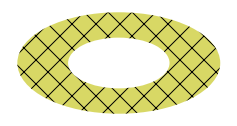

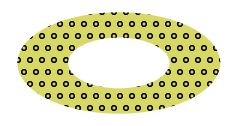

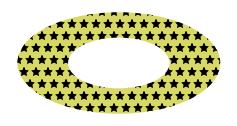

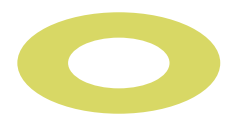

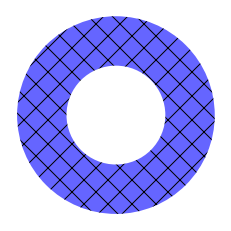

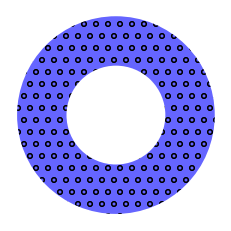

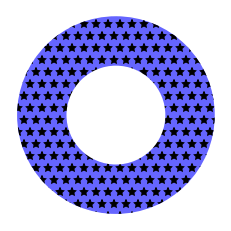

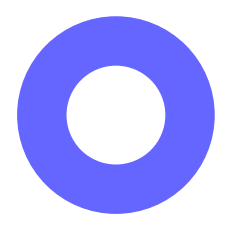

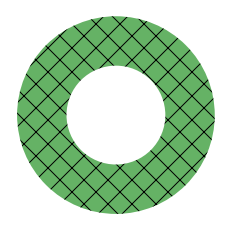

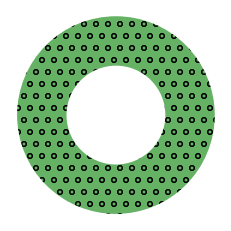

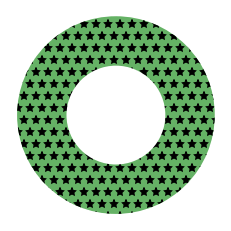

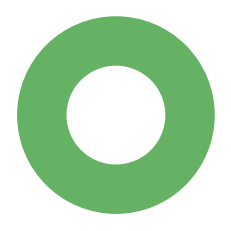

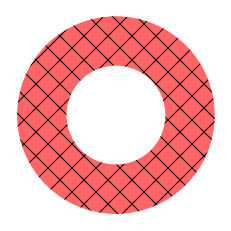

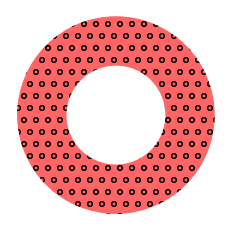

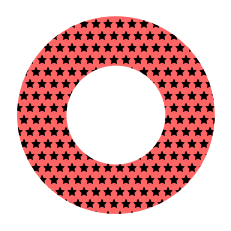

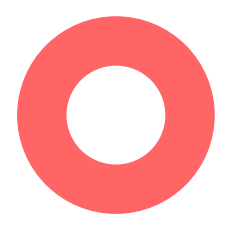

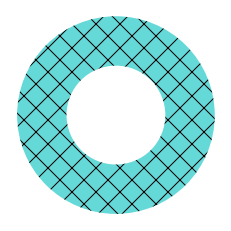

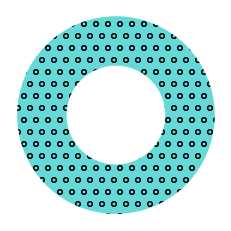

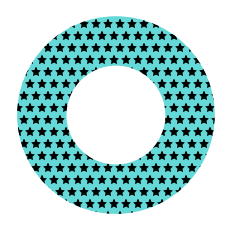

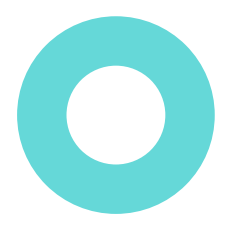

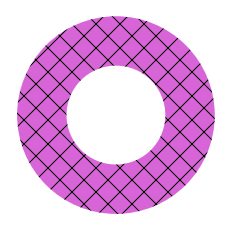

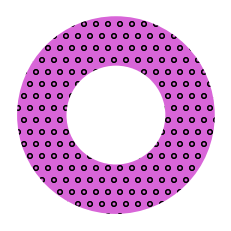

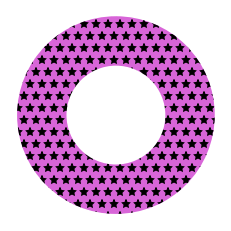

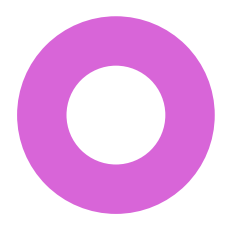

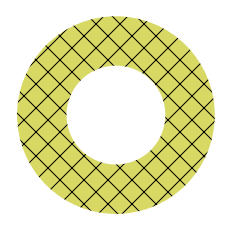

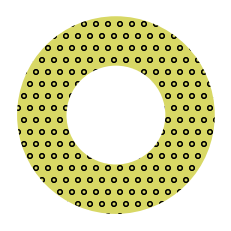

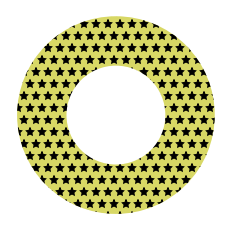

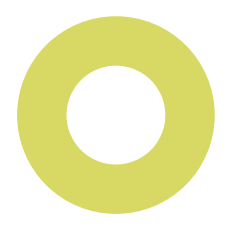

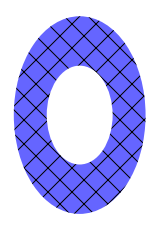

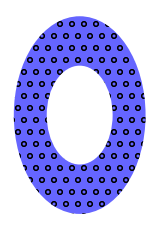

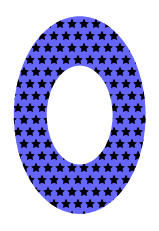

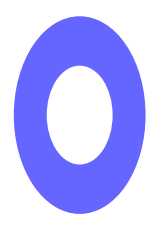

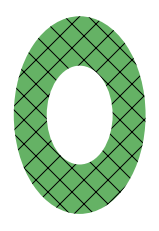

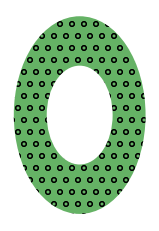

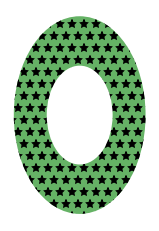

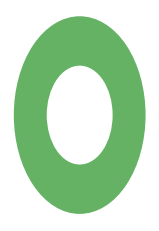

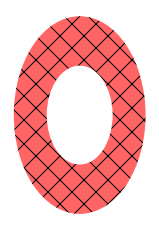

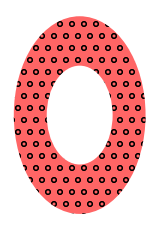

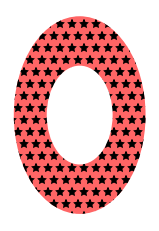

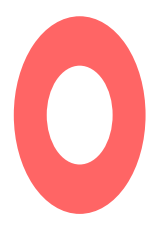

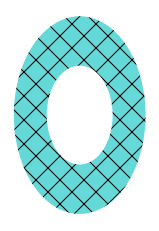

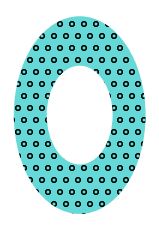

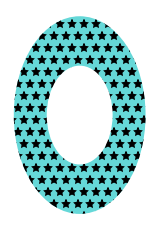

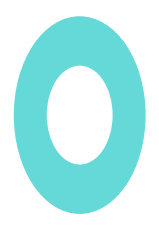

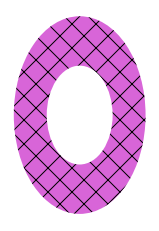

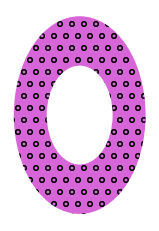

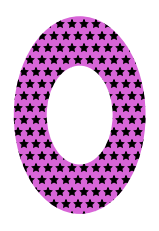

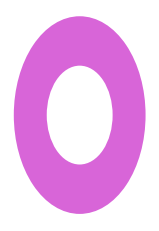

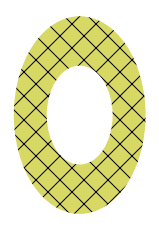

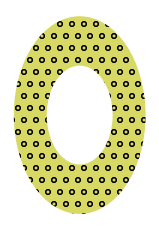

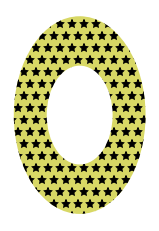

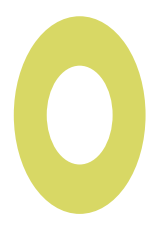

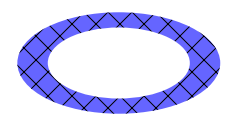

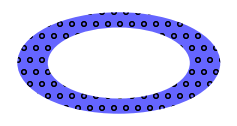

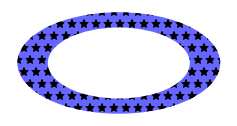

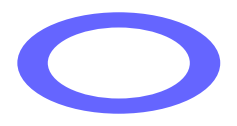

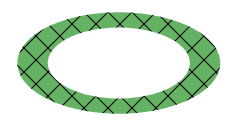

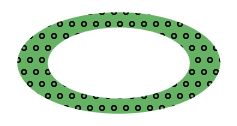

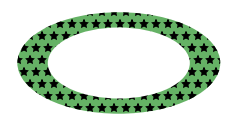

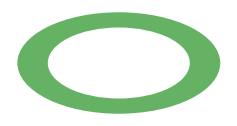

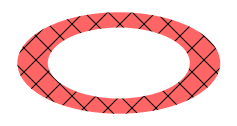

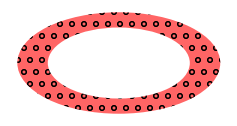

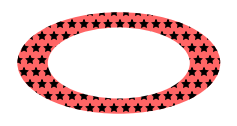

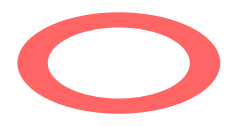

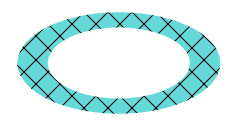

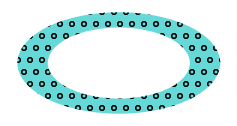

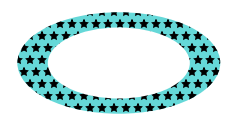

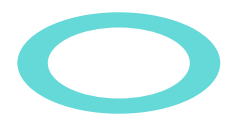

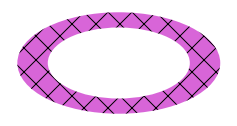

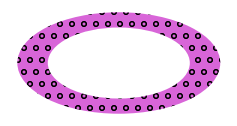

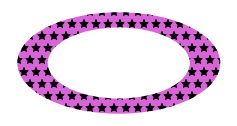

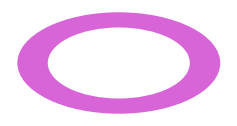

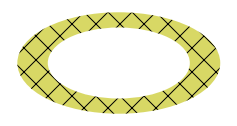

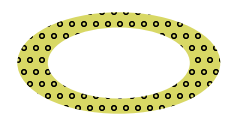

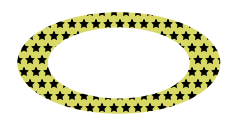

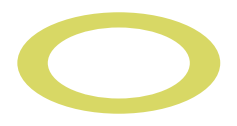

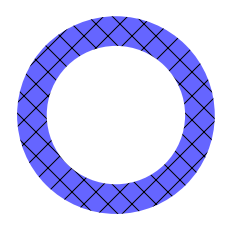

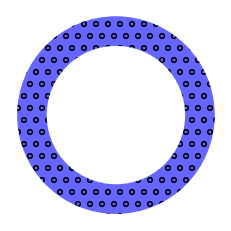

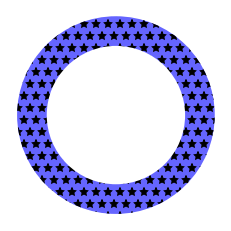

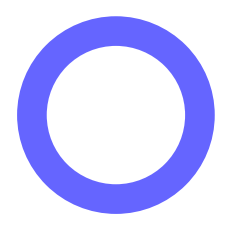

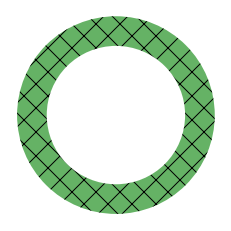

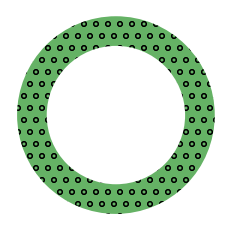

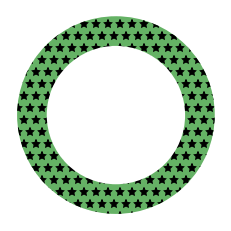

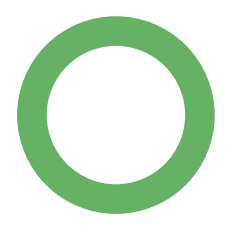

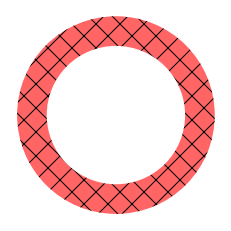

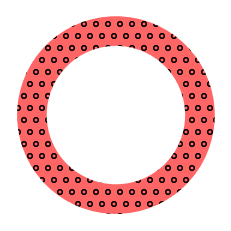

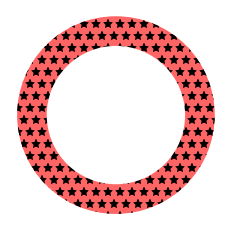

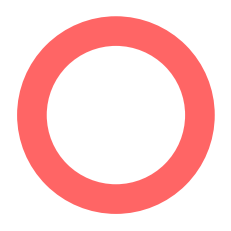

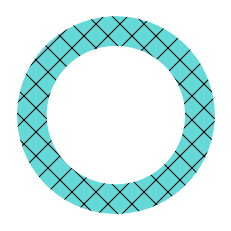

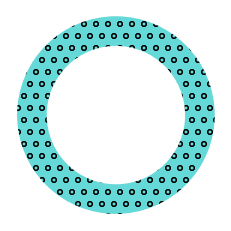

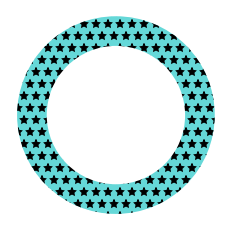

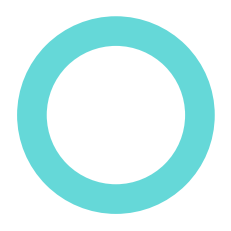

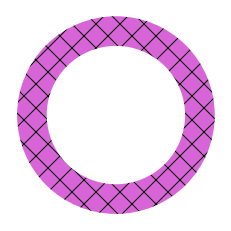

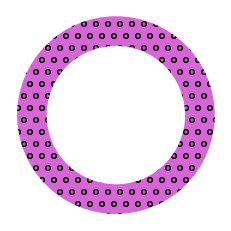

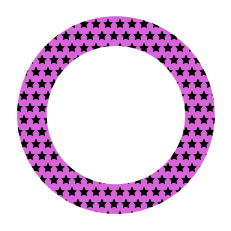

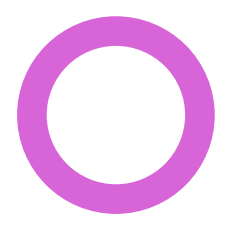

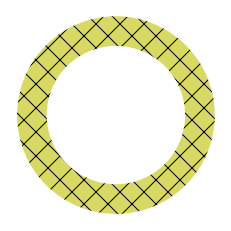

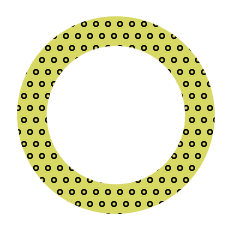

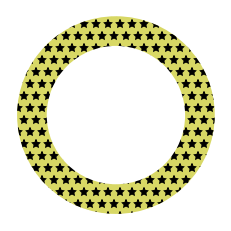

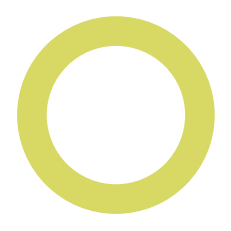

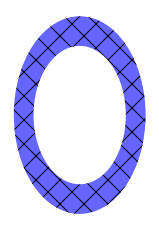

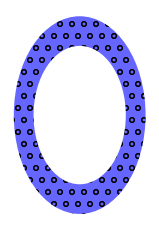

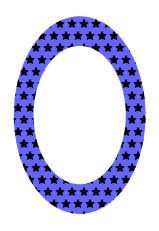

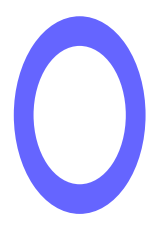

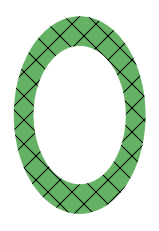

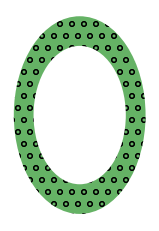

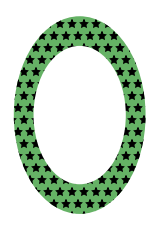

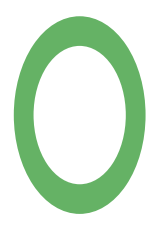

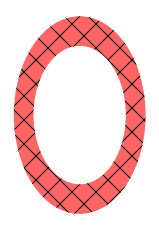

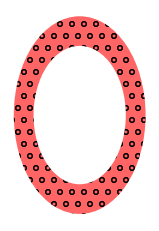

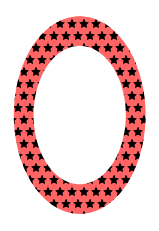

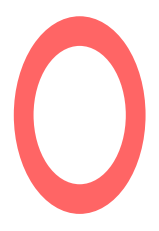

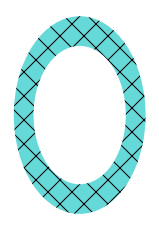

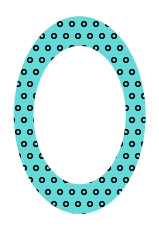

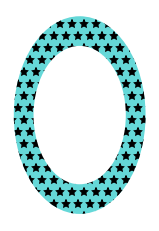

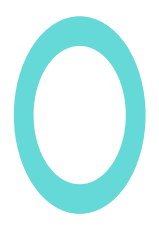

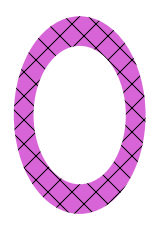

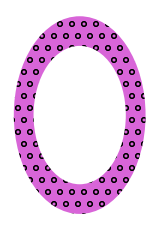

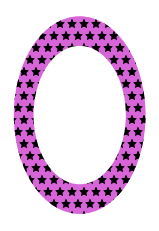

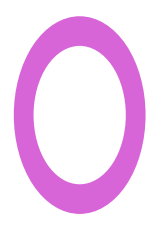

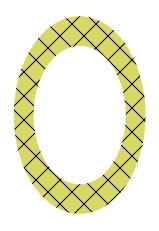

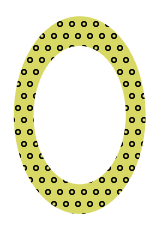

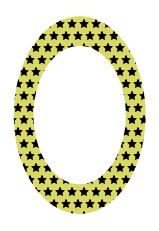

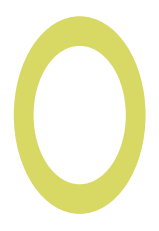

In [10]:
lables_0=[]
lables_1=[]
lables_2=[]


lable_0=0
lable_1=0
lable_2=0


images=True

if images:
    imgs=[]


for n in n_s:
    for scale in scale_s:      
        for stretch in stretch_s:
            for fc in fc_s:
                for pattern in pattern_s:

                    # create images
                    if images:
                        # initilize canvas
                        fig, ax = plt.subplots(figsize=(figsize, figsize))

                        # plot polygon
                        if n=="round":
                            poly = Ellipse(xy=(0, 0), width=1, height=1*stretch, fc=fc,hatch=pattern,alpha=alpha)
                            poly_2 = Ellipse(xy=(0, 0), width=scale, height=scale*stretch, fc='w')


                        else:

                            x,y=get_coords(n)
                            y=y*stretch
                            coords= np.c_[x,y]


                            poly = Polygon(coords, fc=fc,hatch=pattern,alpha=alpha) 
                            poly_2 = Polygon(coords*scale,  fc='w')


                        ax.add_patch(poly)
                        ax.add_patch(poly_2)

                        # No axis
                        ax.axis('image')
                        ax.axis('off')
                        plt.show()


                        # tight_layout
                        fig.tight_layout()
                        fig.canvas.draw()


                        # # Save
                        img=get_img_from_fig(fig, dpi=dpi)

                        imgs.append(img)

                    # append the labels at different level
                    lables_0.append(lable_0)
                    lables_1.append(lable_1) 
                    lables_2.append(lable_2) 
                    
                    
            lable_2+=1   
        lable_1+=1
    lable_0+=1 

imgs=np.array(imgs)

### save imgs

In [11]:
image_fold="imgs"

In [12]:
if not os.path.exists(image_fold):
    os.makedirs(image_fold)

In [13]:
for i,img in enumerate(imgs):
    img = Image.fromarray(img)
    img.save(os.path.join(image_fold,str(i)+".jpeg"))

In [267]:
spirit=images_to_sprite(imgs)

In [268]:
spirit_img = Image.fromarray(spirit)
spirit_img.save(os.path.join(image_fold,"spirit.jpeg"))

### Spilit images

In [2]:
import random
import pickle

In [454]:
val_classes=random.sample(set(lables_2),8)

In [455]:
val_classes=([i+random.sample([0,1,2],1) for  i in linspace(0,33,12)])

In [456]:
val_classes=[int(i) for i in val_classes]

In [457]:
train_classes=[i for i in (set(lables_2))  if i not in val_classes]

In [458]:
train_imgs=[]
train_high_lbs=[]
train_coarse_lbs=[]
train_lbs=[]

val_imgs=[]
val_high_lbs=[]
val_coarse_lbs=[]
val_lbs=[]



for i,img in enumerate(imgs):
    if lables_2[i] in val_classes:
        val_imgs.append(imgs[i])
        val_high_lbs.append(lables_0[i])
        val_coarse_lbs.append(lables_1[i])
        val_lbs.append(lables_2[i])

        
        
    else:
        train_imgs.append(imgs[i])
        train_high_lbs.append(lables_0[i])
        train_coarse_lbs.append(lables_1[i])
        train_lbs.append(lables_2[i])

val_imgs=np.array(val_imgs)
train_imgs=np.array(train_imgs)


In [482]:
### save to dic
train_targets={"high_targets":train_high_lbs,
               "coarse_targets":train_coarse_lbs,
               "targets":train_lbs}
val_targets={"high_targets":val_high_lbs,
               "coarse_targets":val_coarse_lbs,
               ""targets":val_lbs}
simple_targets={"train":train_targets,"val":val_targets}

In [483]:
simple_imgs={"train":train_imgs,"val":val_imgs}

In [484]:
### save to pickle

In [485]:
with open("simple_imgs.pkl", "wb") as tf:
    pickle.dump(Simple_imgs,tf)
    
with open("simple_targets.pkl", "wb") as tf:
    pickle.dump(Simple_targets,tf)
    


In [486]:
### read pickle

In [121]:
with open("simple_imgs.pkl", "rb") as tf:
    Simple_imgs_load = pickle.load(tf)
with open("simple_targets.pkl", "rb") as tf:
    Simple_targets_load = pickle.load(tf)

In [123]:
### Create hiearhical dataset

In [124]:
from torch.utils.data import Dataset
class Simple_Hier_Dataset(Dataset):
    """
    Train: For each sample creates randomly a positive or a negative pair
    Test: Creates fixed pairs for testing
    """

    def __init__(self, simple_imgs,simple_targets,transform):

        self.transform = transform
        
        self.data =simple_imgs
        self.targets=simple_targets["targets"]
        self.coarse_targets=simple_targets["coarse_targets"]
        self.high_targets=simple_targets["high_targets"]
        
        
        
        
    def __getitem__(self, index: int) :
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        img, target = self.data[index], self.targets[index]
        
        coarse_target=self.coarse_targets[index]
        high_target=self.high_targets[index]
        

        img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)

        return img, target,coarse_target,high_target

    def __len__(self):
        return len(self.data)

In [138]:
H_train_fs=Simple_Hier_Dataset(Simple_imgs_load["train"],Simple_targets_load["train"],None)

In [ ]:
val_fs=Simple_Hier_Dataset(Simple_imgs_load["val"],Simple_targets_load["val"],None)